#**I will apply end to end devops Implementation in this project** ✅

**clonning the project**

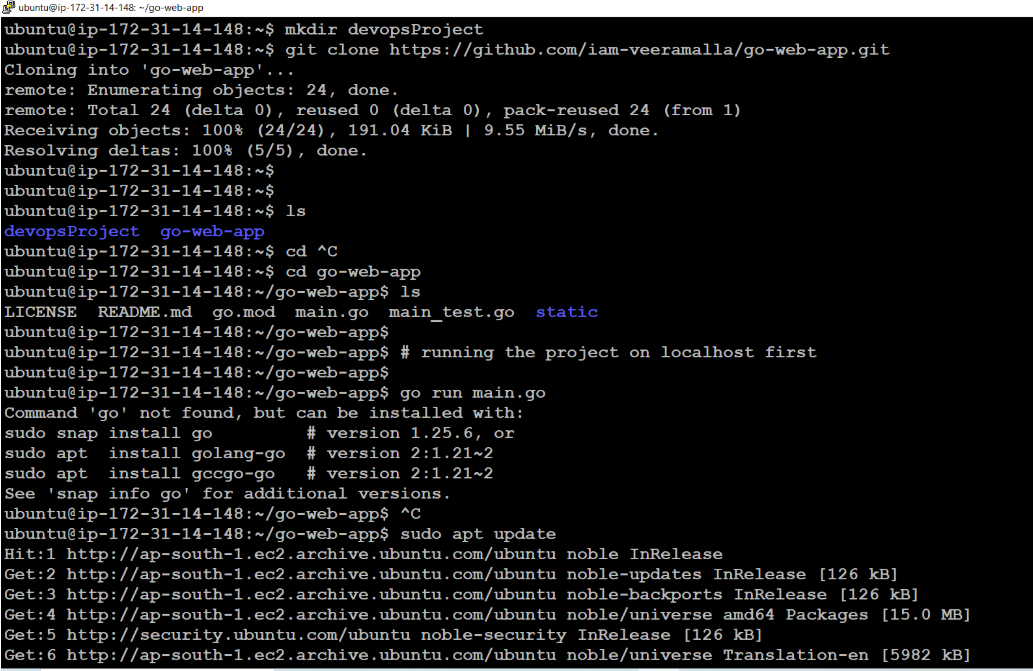

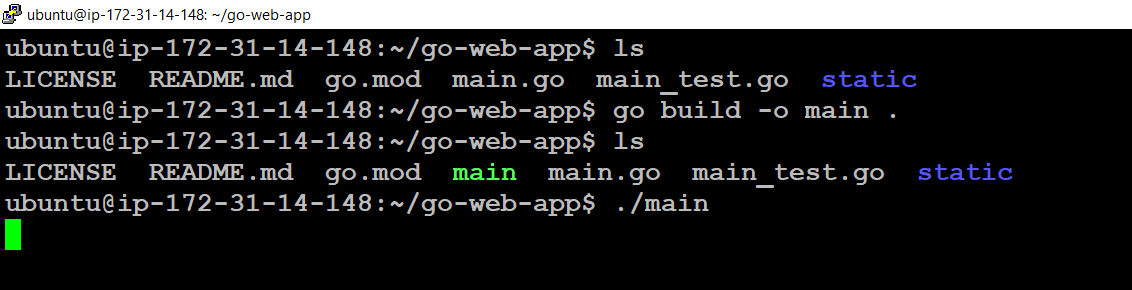

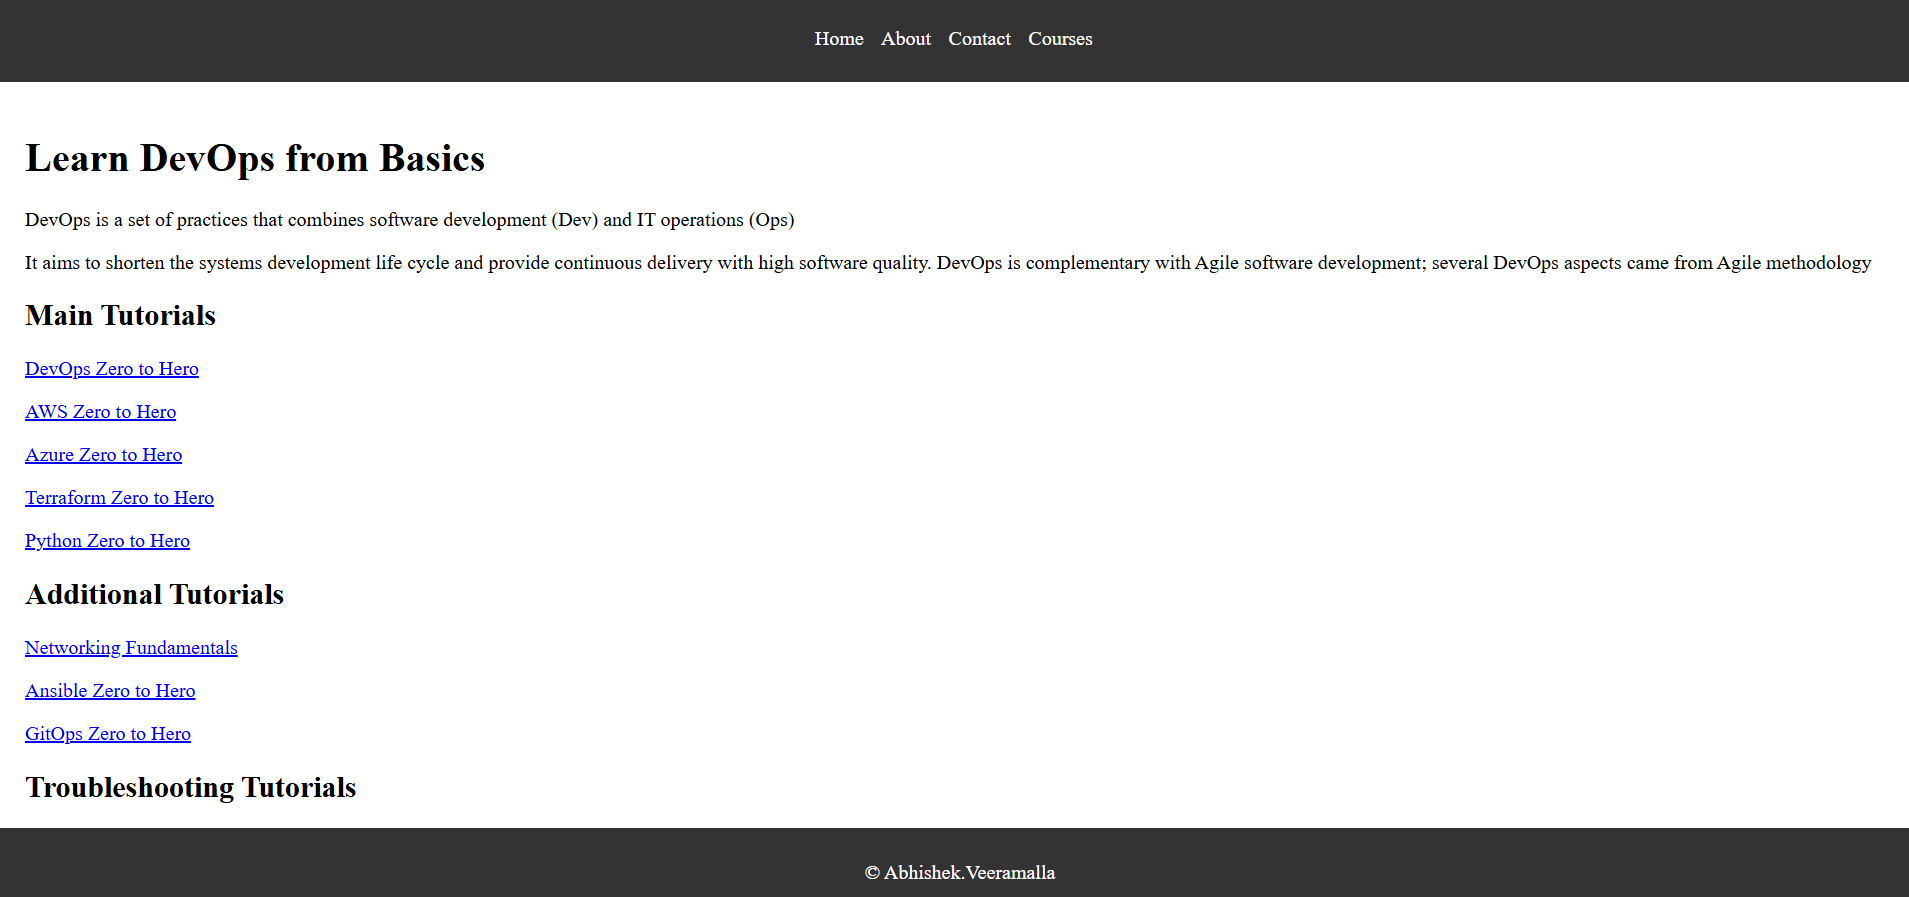

#**Creating a DockerFile**

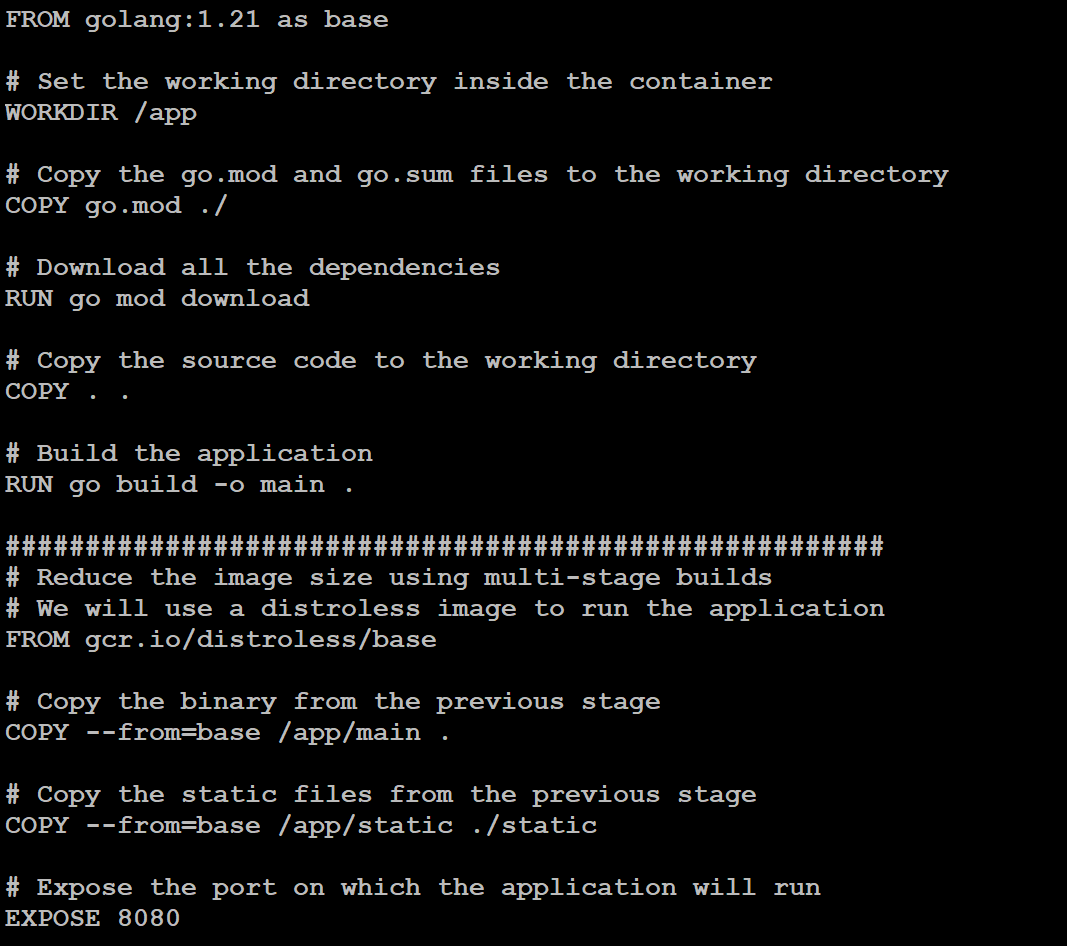



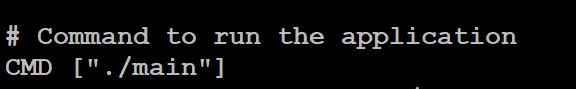

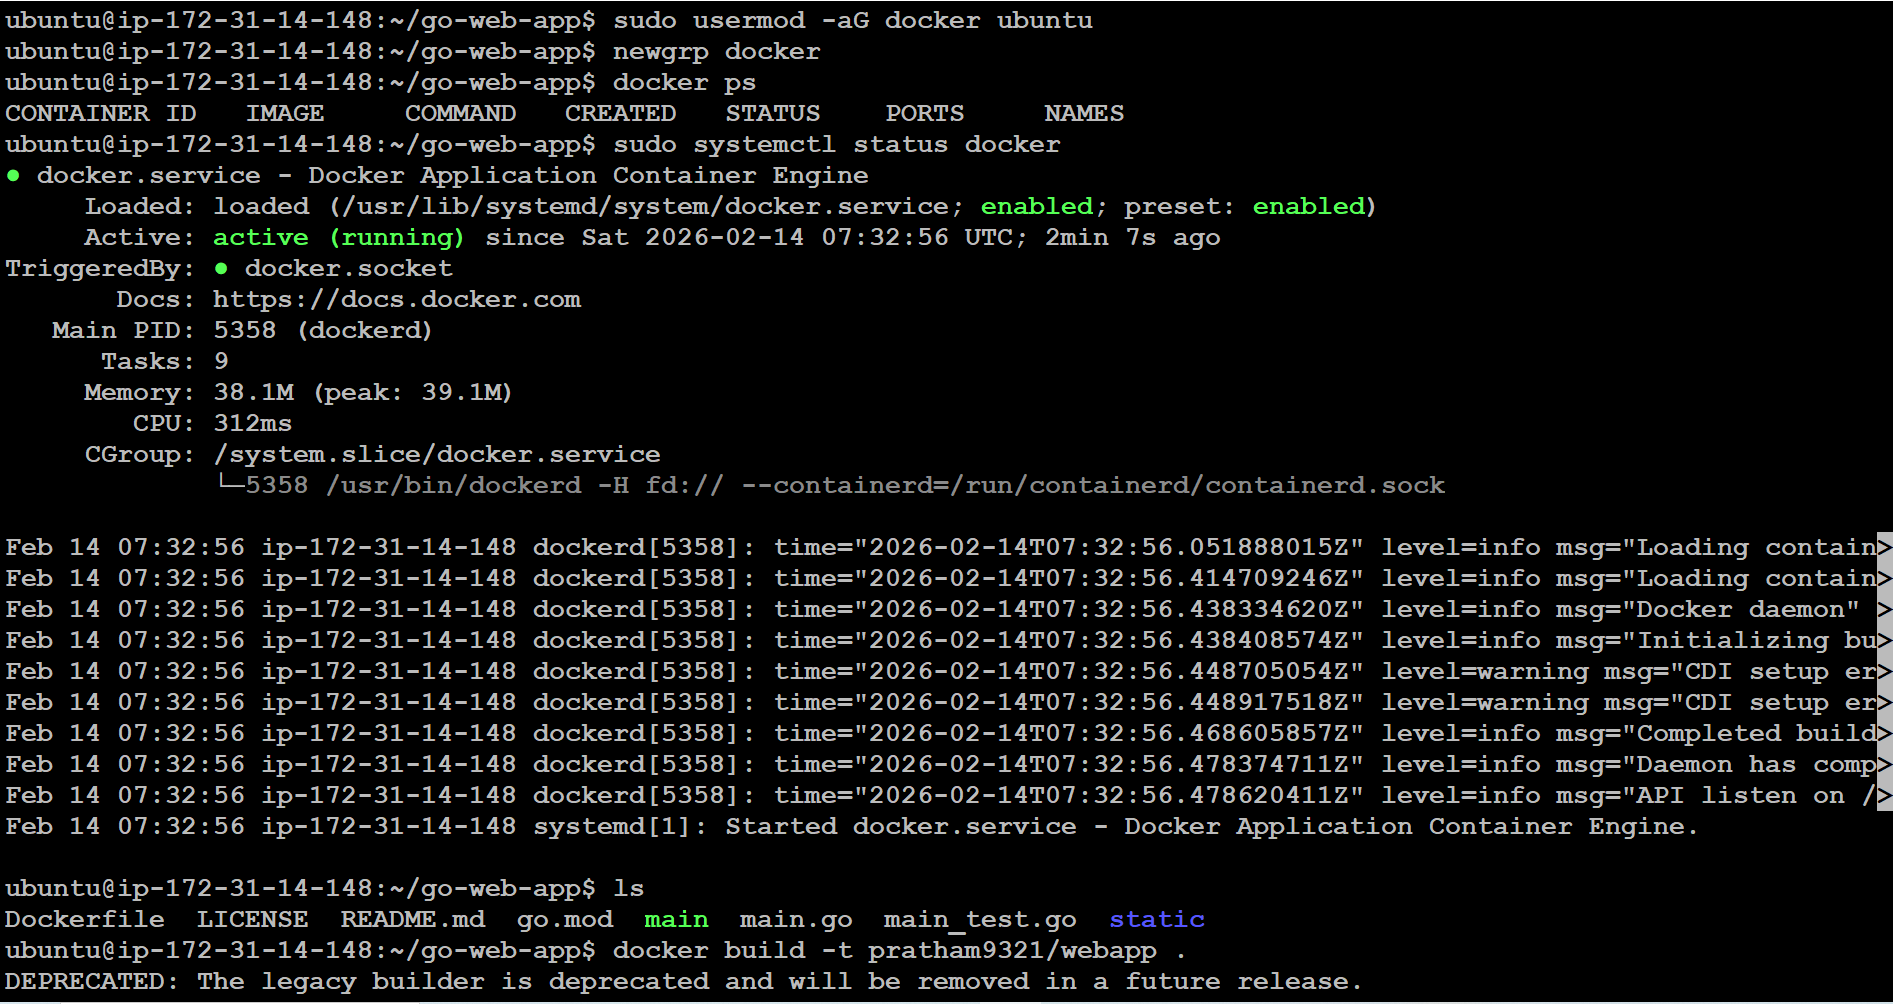

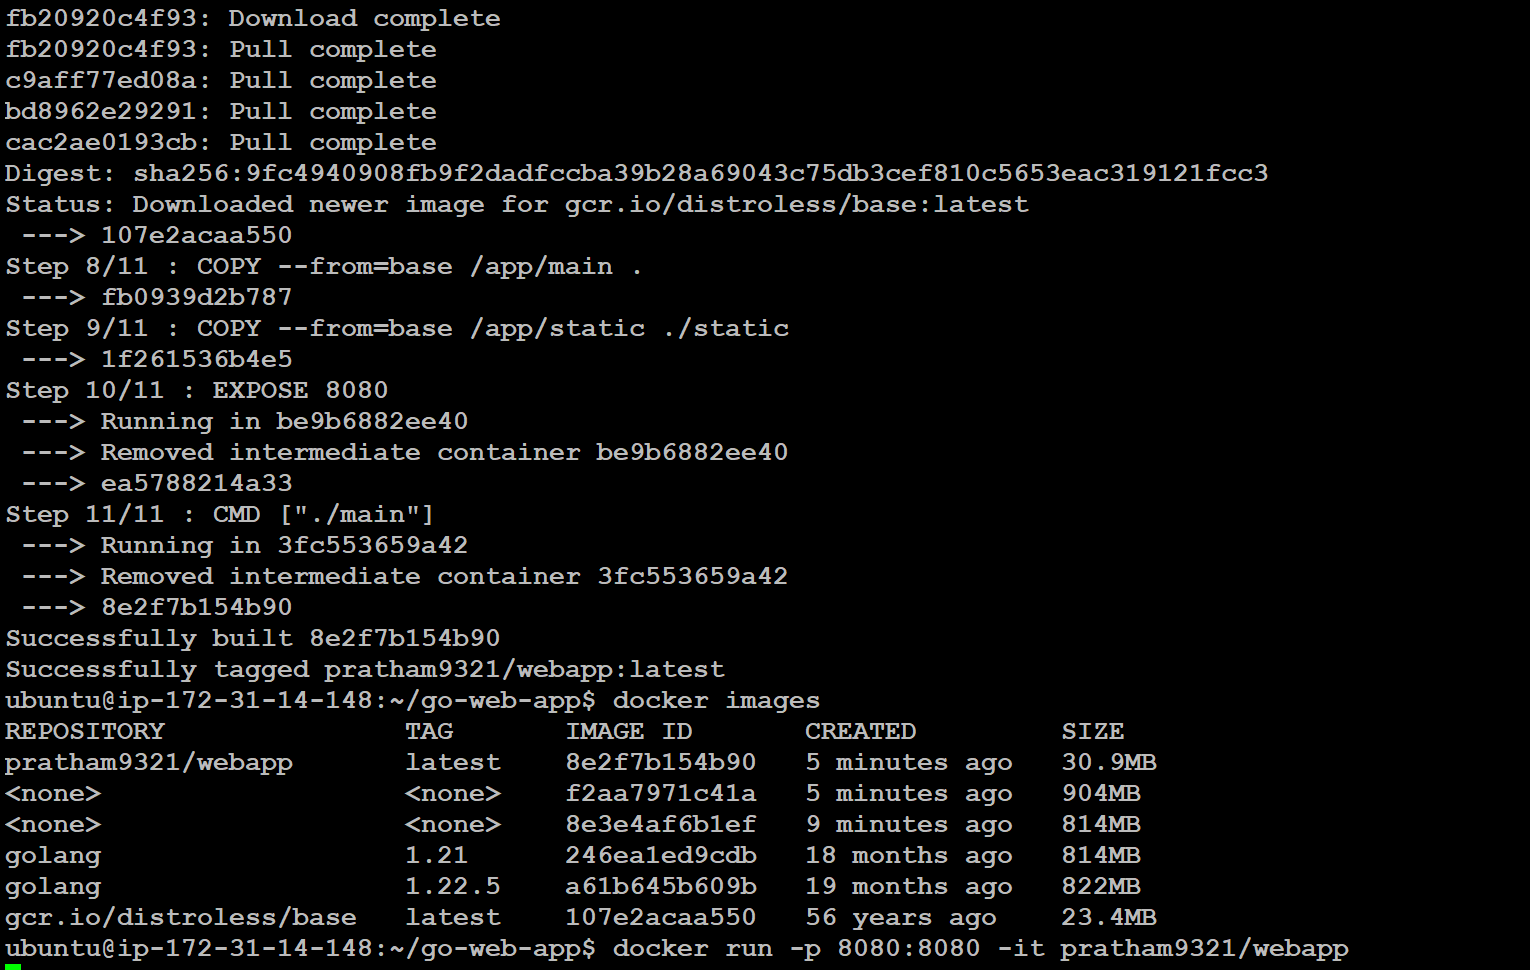

#**Lets create a pods sepecification file that is deployment.yml inside k8s/manifest**

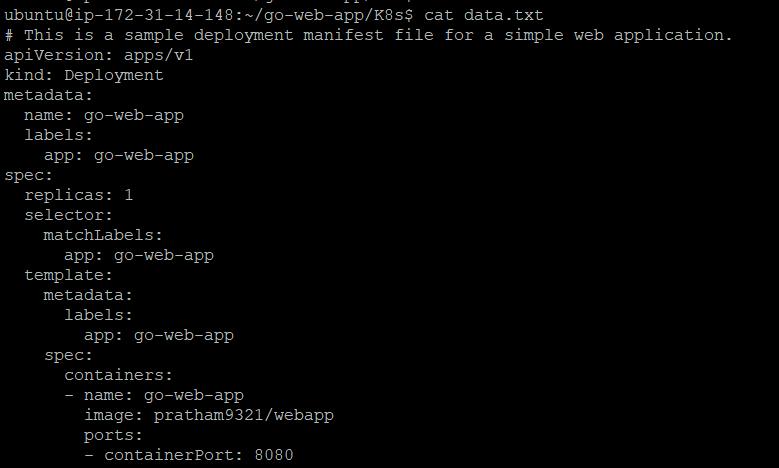

#**Creating service.yml**
👉 service.yml exposes your Pods and allows communication.

Because in Kubernetes:

Pods are temporary and their IP addresses change.

So we create a Service to give a stable IP / DNS name to access the pods.

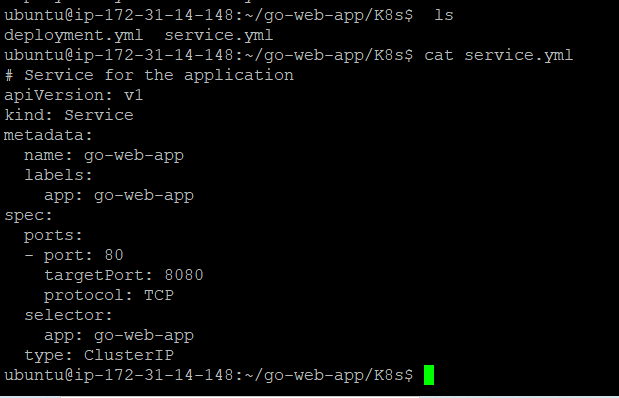

#**Ingress manages external HTTP/HTTPS access to your services.**

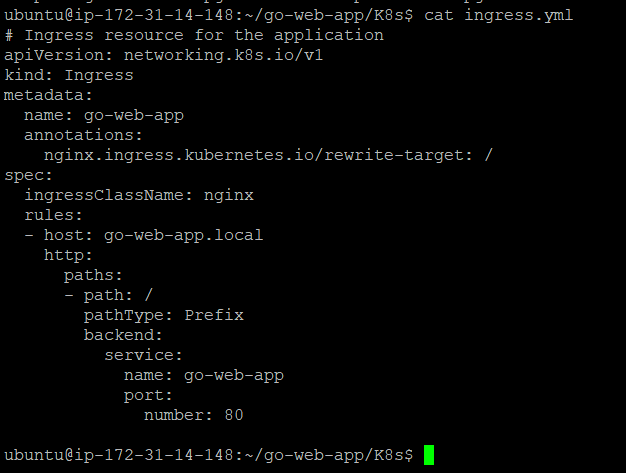

Installing

kubectl

eksctl

aws

#**further Command to Install EKS cluster with EKSCTL**

In [ ]:
option 1 - eksctl create cluster --name demo-cluster --region us-east-1


✅ option 2 — Create Small & Safe Cluster (All-in-One Command)

Now create cluster + nodegroup together:

eksctl create cluster \
  --name pratham-small \
  --region ap-south-1 \
  --node-type t3.small \
  --nodes 1 \
  --managed

#**Delete the cluster**

In [ ]:
eksctl delete cluster --name demo-cluster --region us-east-1

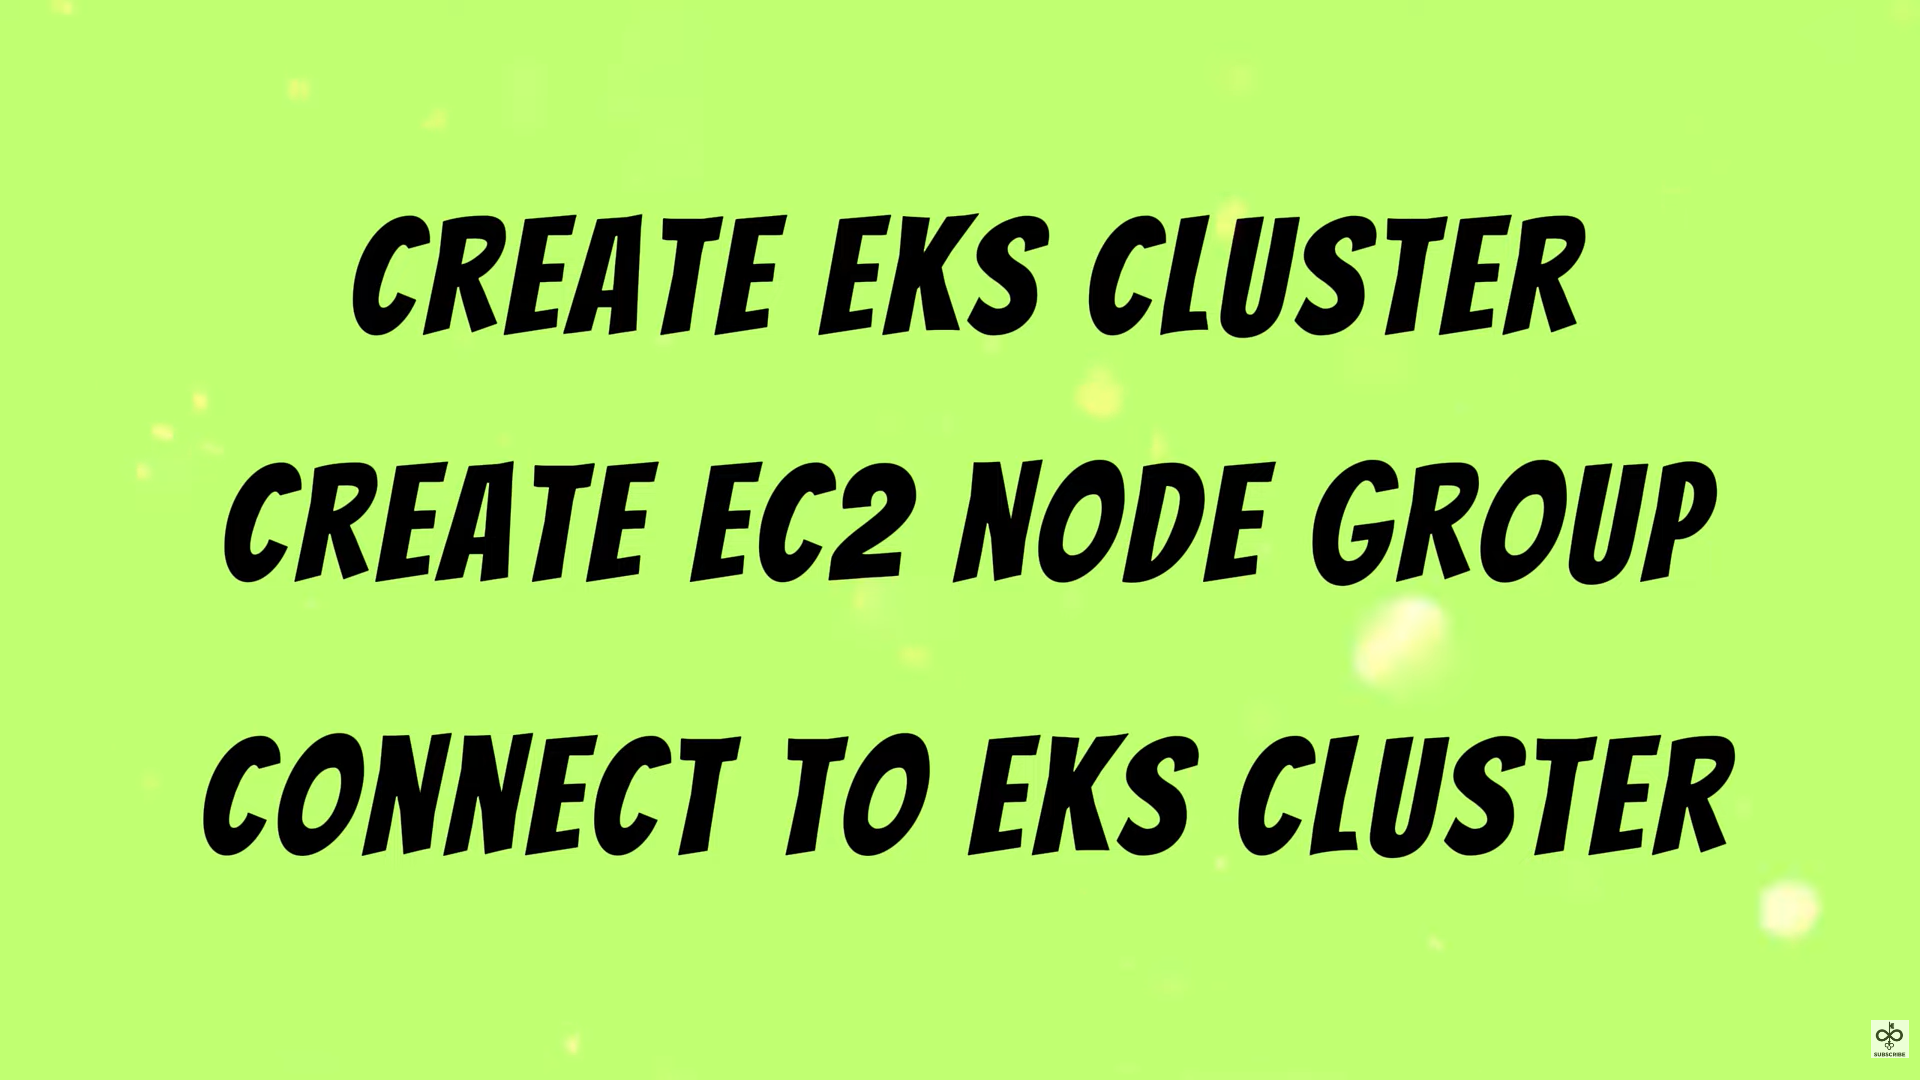

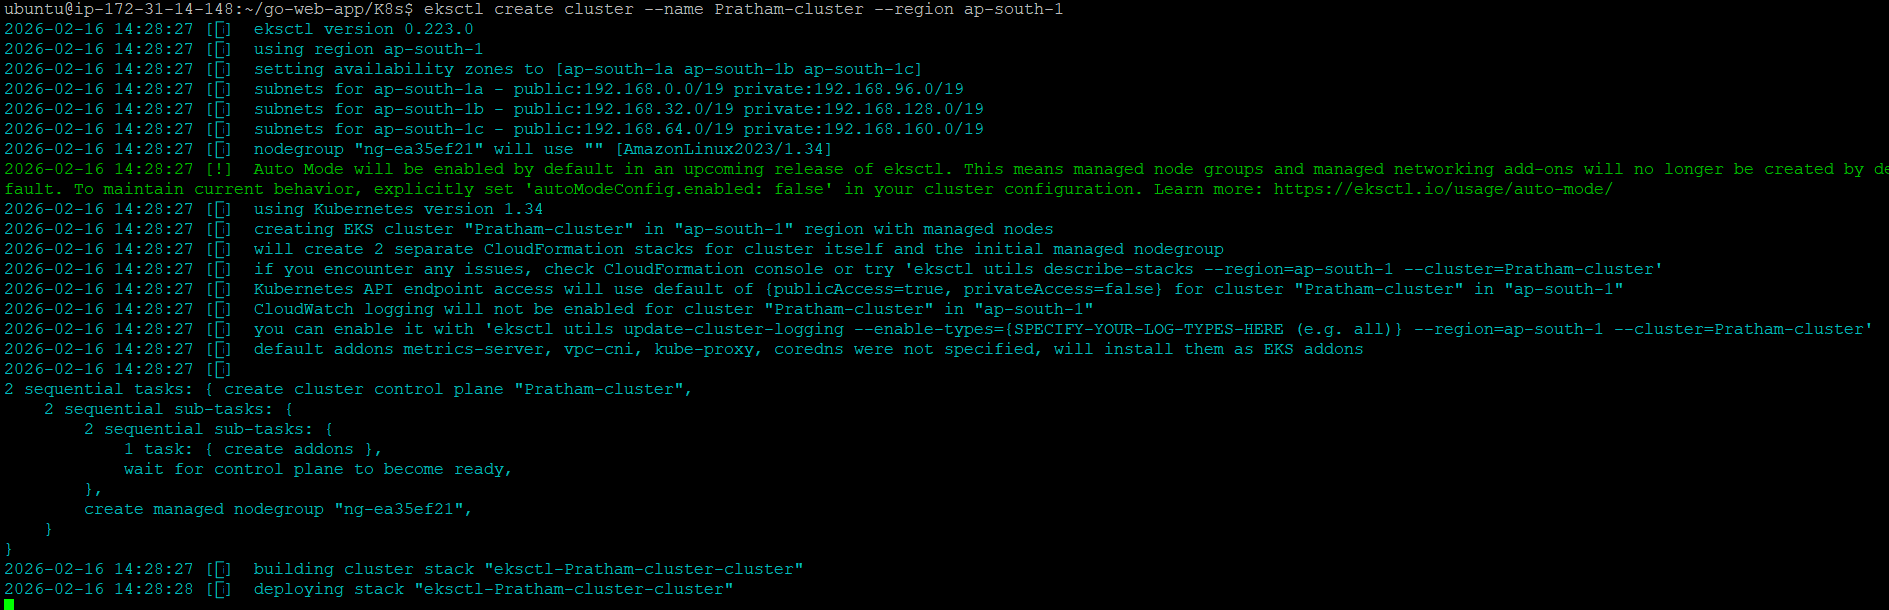

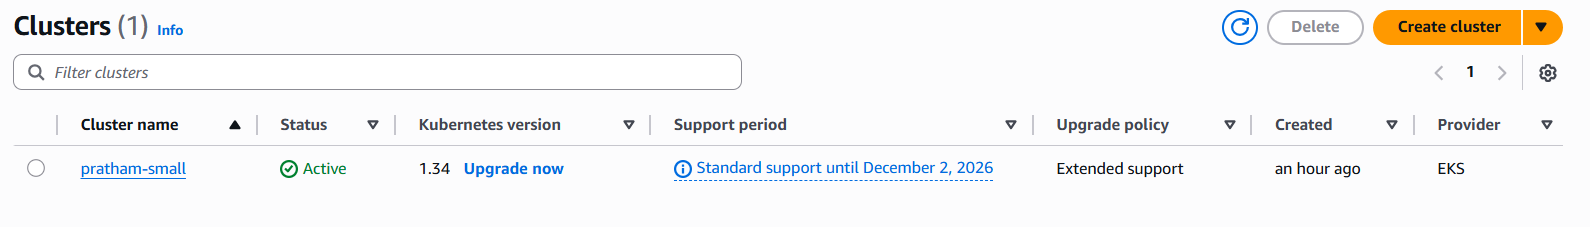

#**What Happens When You Apply deployment.yml?**

#**kubectl apply -f k8s/manifest/deployment.yml**

Kubernetes:

1️⃣ Creates a Deployment

2️⃣ Deployment creates a ReplicaSet

3️⃣ ReplicaSet creates Pods

4️⃣ Pods run your containers


🔥 What deployment.yml Controls

1️⃣ Number of Pods (Scaling)
replicas: 3


Means:

Run 3 copies of app

If 1 dies → create new one

If you change to 5 → auto scale

2️⃣ Container Image

image: node:18

Defines which Docker image to use.

Container Port

containerPort: 5000


Tells Kubernetes which port your app runs on.

4️⃣ Rolling Updates

If you change:

image: node:19


And apply again →

Kubernetes:

Stops old pods slowly

Starts new ones

No downtime

#**Creating Pods**

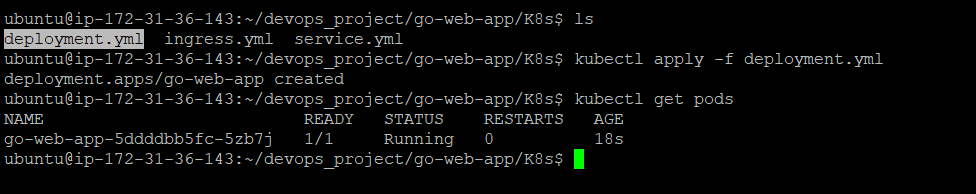

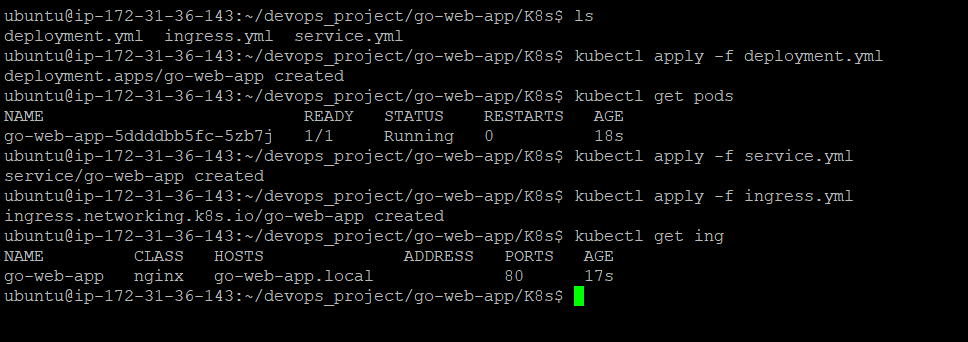

Thus the address is not assign rignt now for this we need ingress controller -(ingress controller assigns the address for the ingress resources) **Ingress = Domain routing layer**

before doing that lets verify if the service is working fine

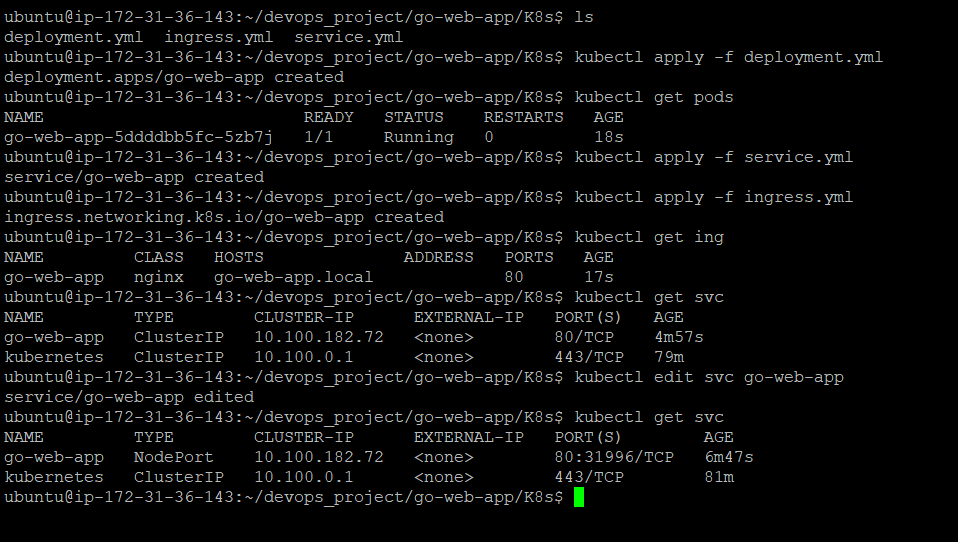

now lets check weather our application is running fine on kubernetes cluster or not

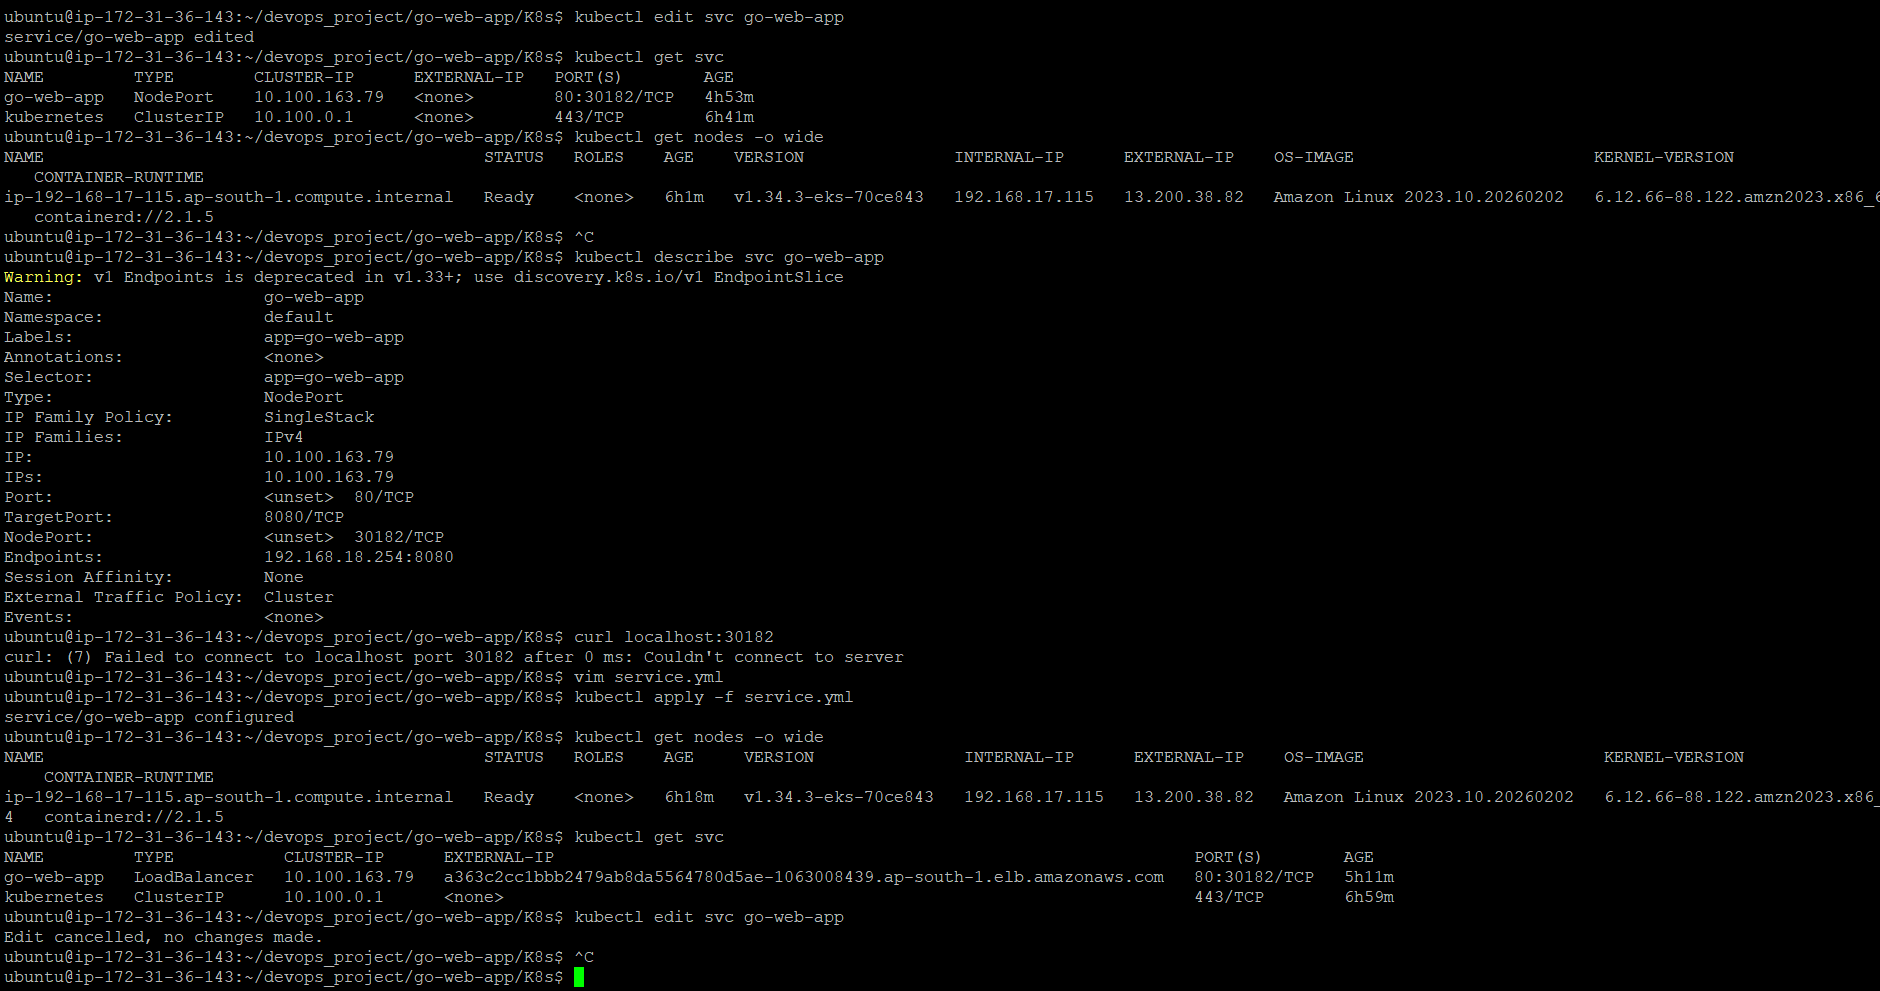

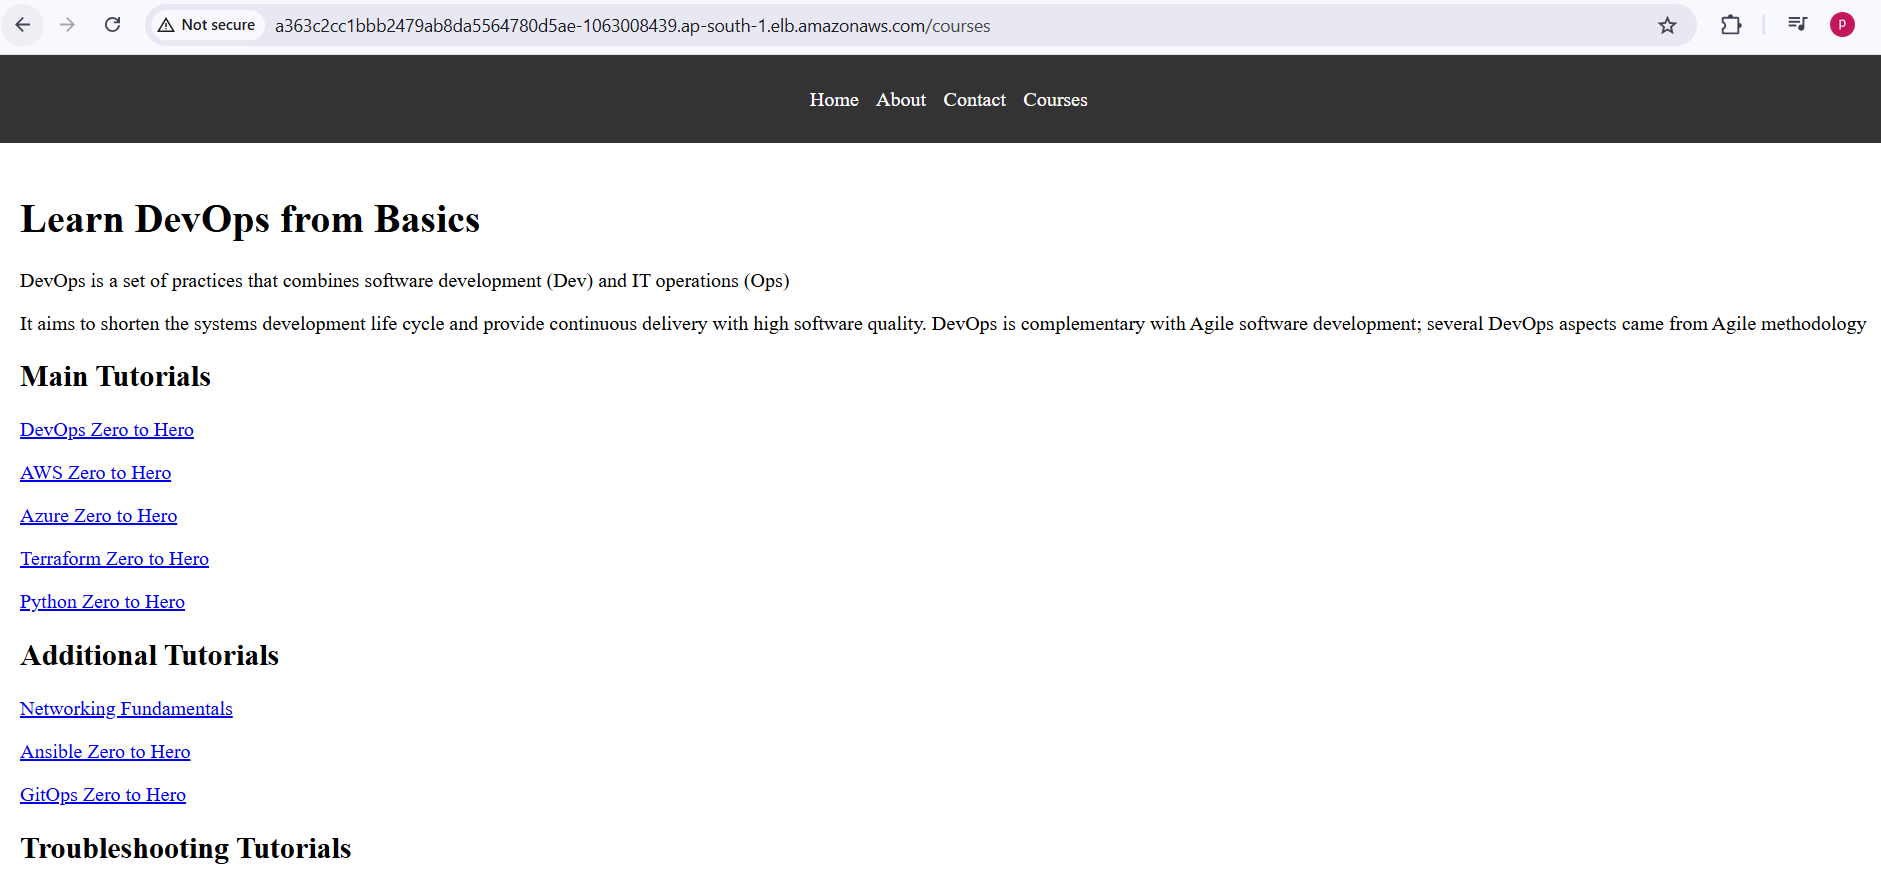

#**Now lets configure ingress controller**

ingress <- watch <- **ingress controller** -> create -> loadbalancer

Ingress Controller is a smart traffic manager for your Kubernetes cluster. it routes the traffic to specific pods (act as a netwrok load balancer)

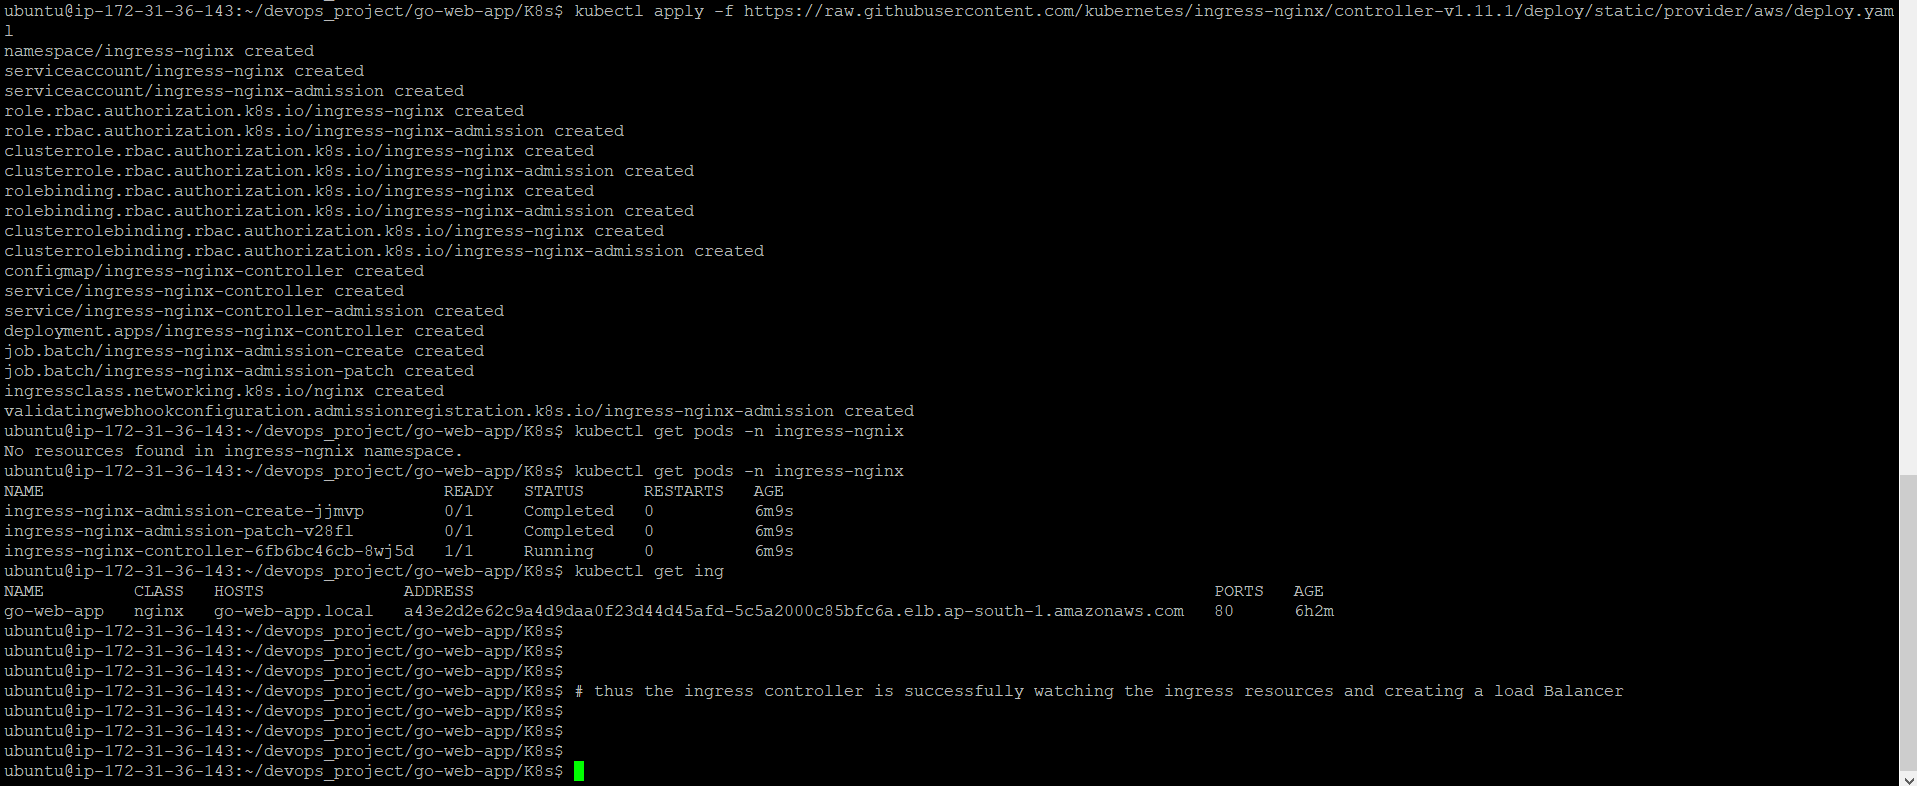

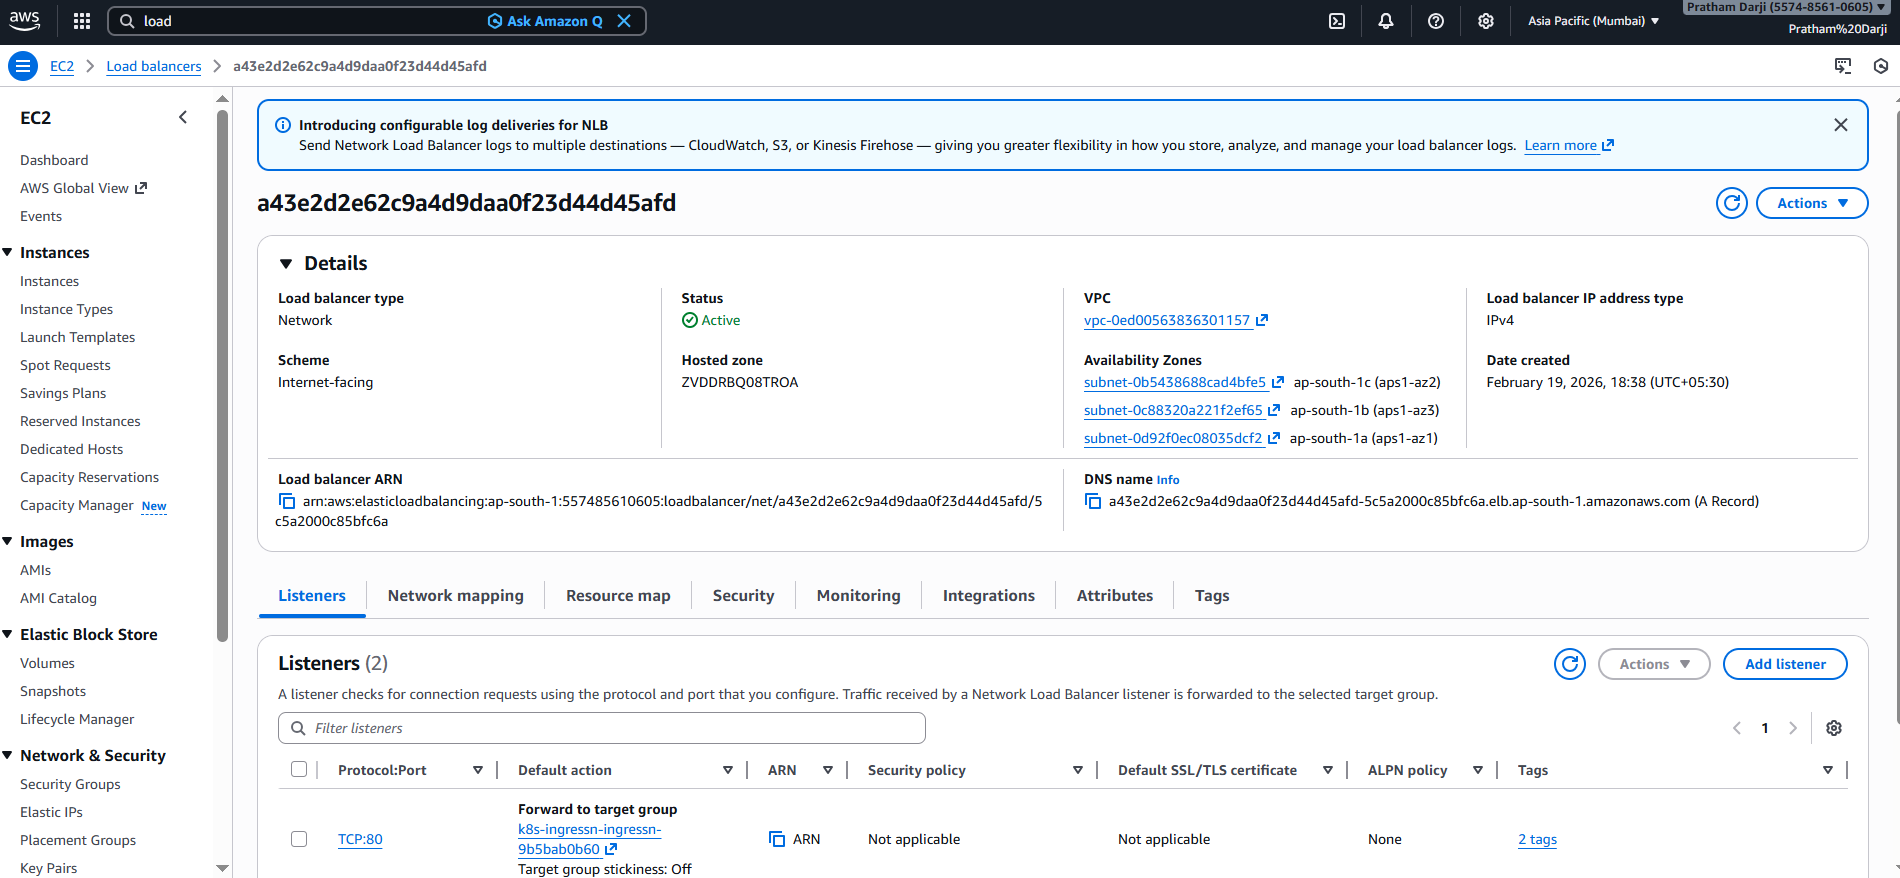

**we cant access the above load balancer address because in the ingress configuration ingress file - we have clearly mention the host - go-web-app.local**

**so we have to map the host name**

**SO we have to do Dns Mapping **

**nslookup is a command used to find the IP address associated with a domain name (i.e., it checks DNS resolution).**

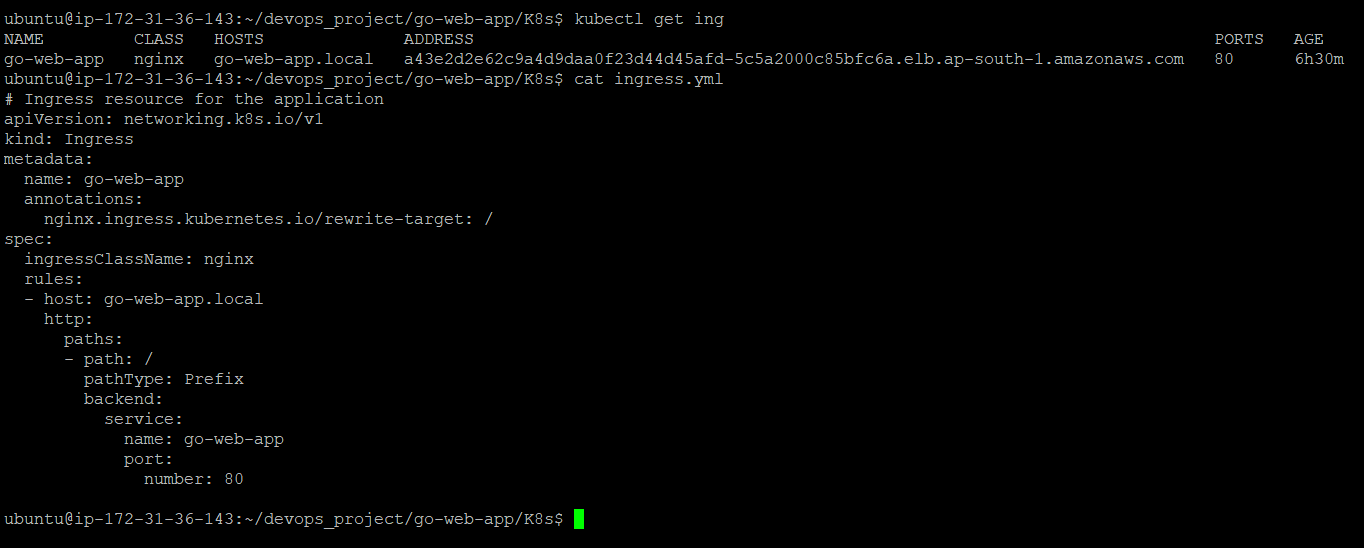

since i m working on windows

Step 1: Open Windows Hosts File (as Administrator)
Press:
Win + S → search “Notepad”
Right click → Run as Administrator

Then open this file:
C:\Windows\System32\drivers\etc\hosts
(Change file type to “All Files” if not visible)

Step 2: Add This Line at the Bottom
Use your ELB IP (from nslookup):
65.2.50.232 go-web-app.local

Final should look like:
127.0.0.1 localhost
::1 localhost
65.2.50.232 go-web-app.local

Save the file.

Step 3: Flush DNS Cache (IMPORTANT)
Open Command Prompt (Admin) and run:
ipconfig /flushdns

Step 4: Now Open in Browser
http://go-web-app.local

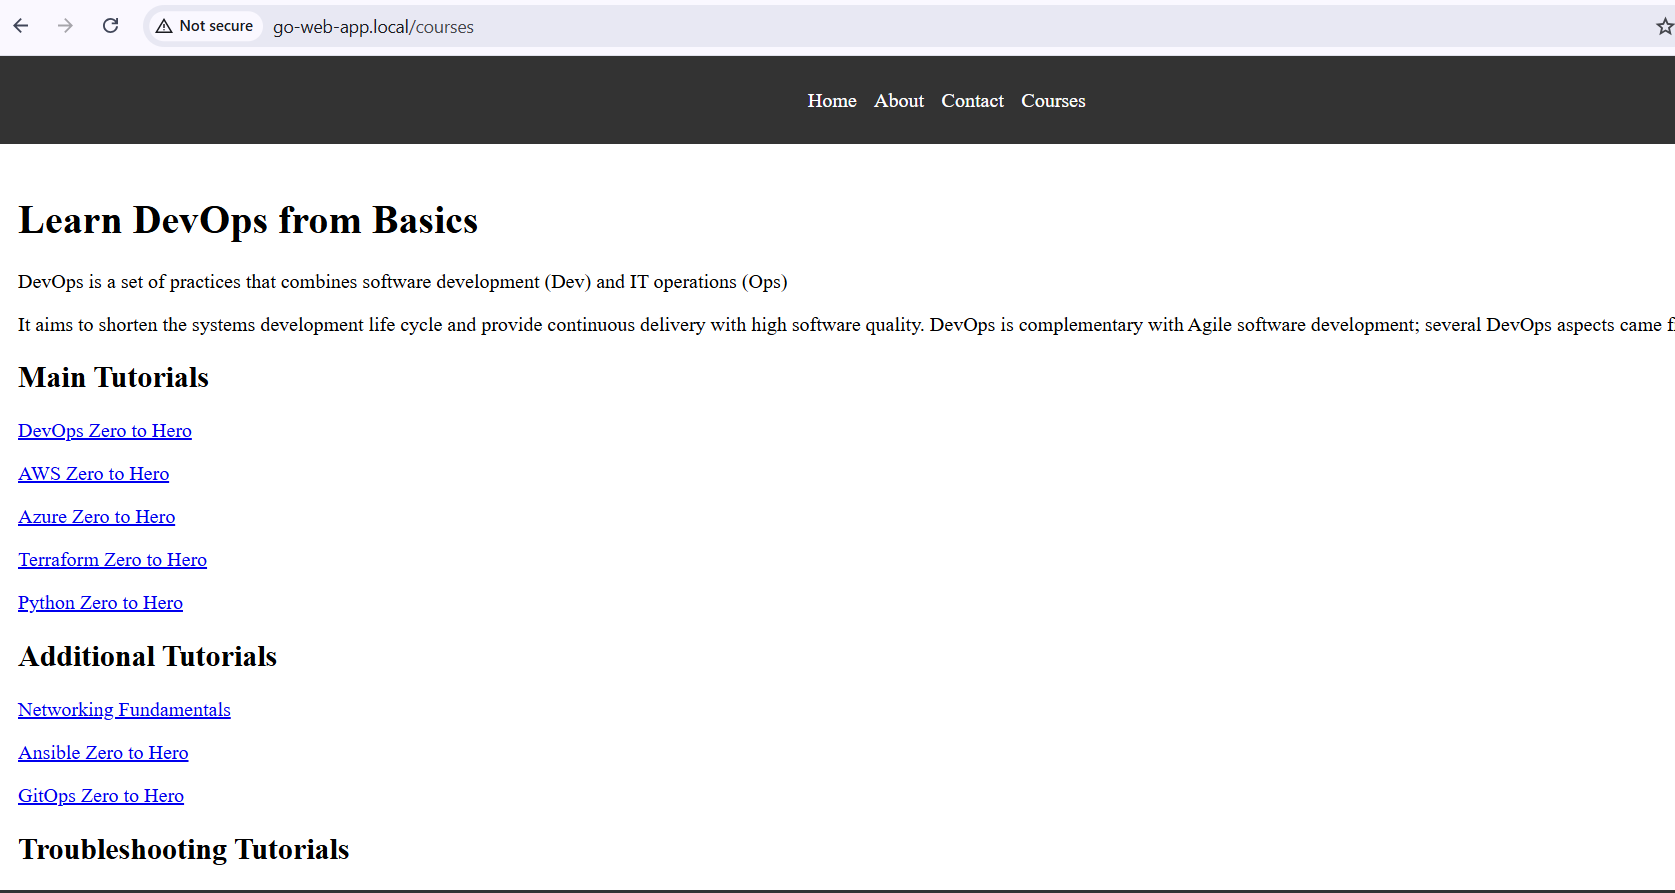

**so till now Containerization done , kubernetes manifest done ,kubernetes cluster done, ingress configuration done**

**now we will do helm chart creation before implementing cicd**

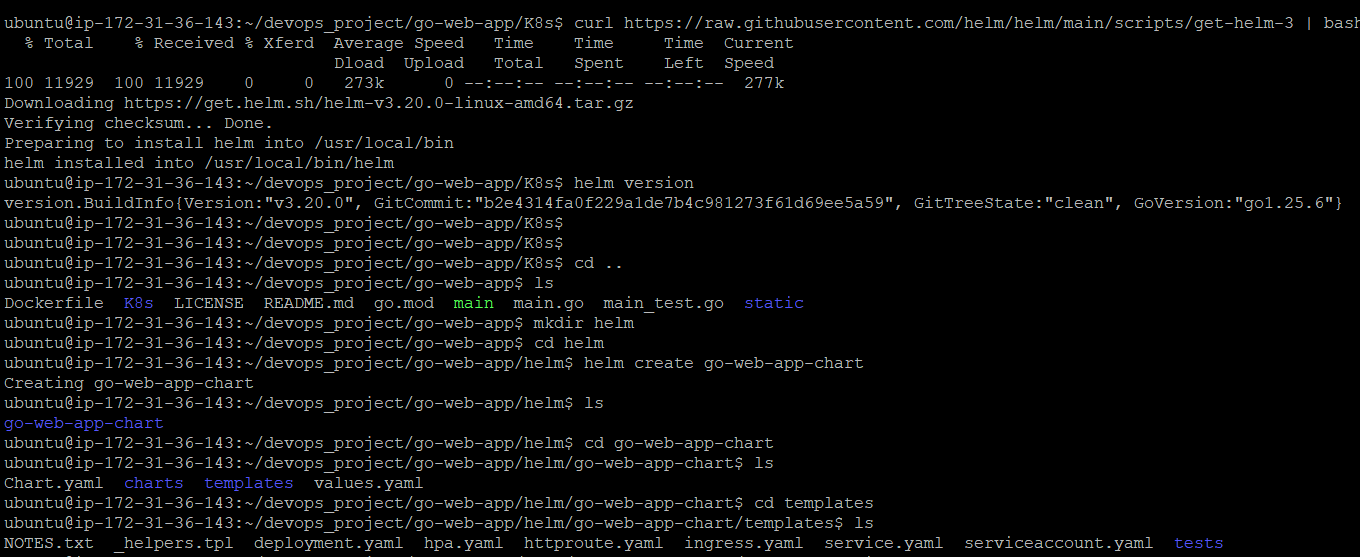

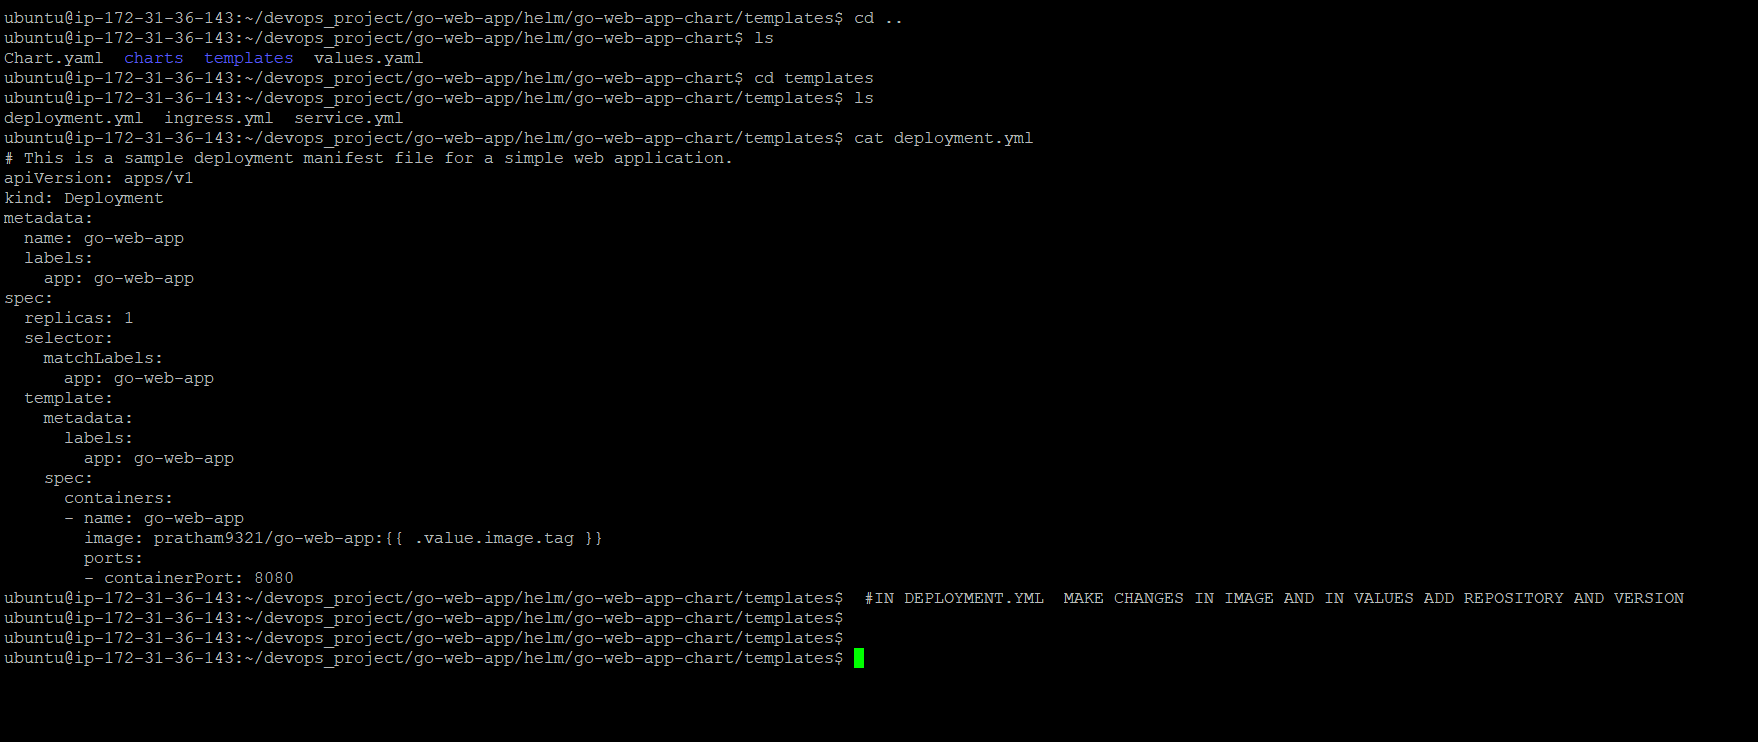

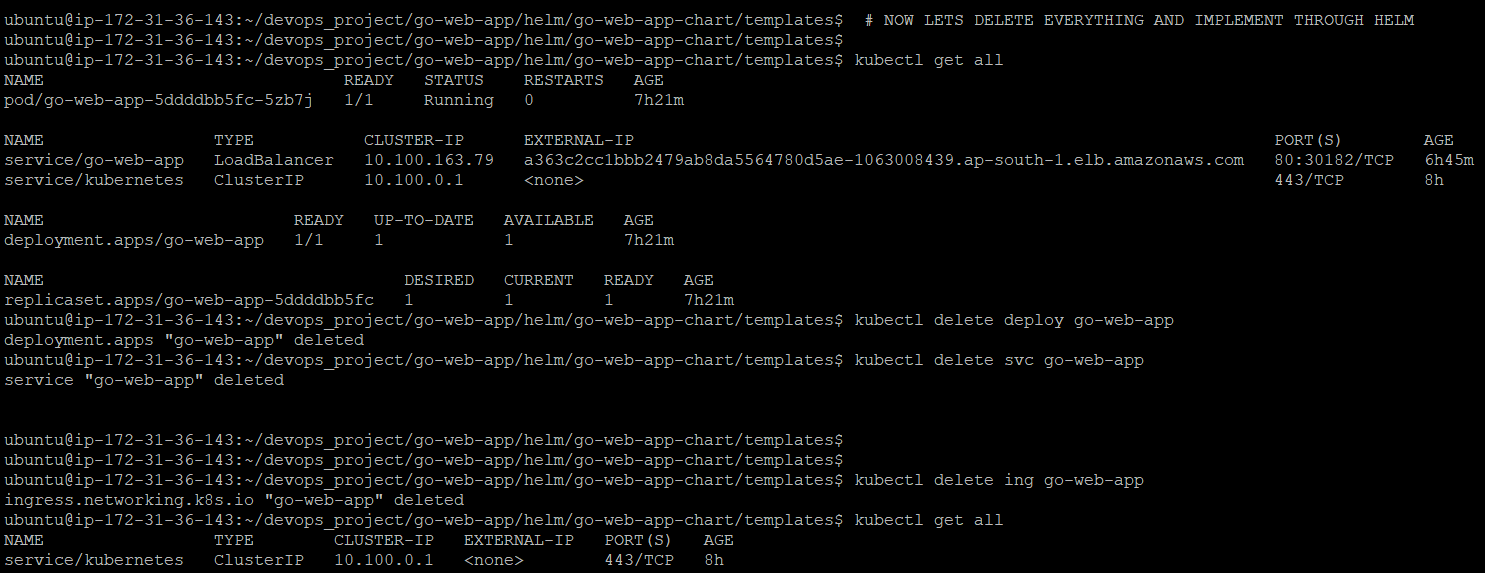

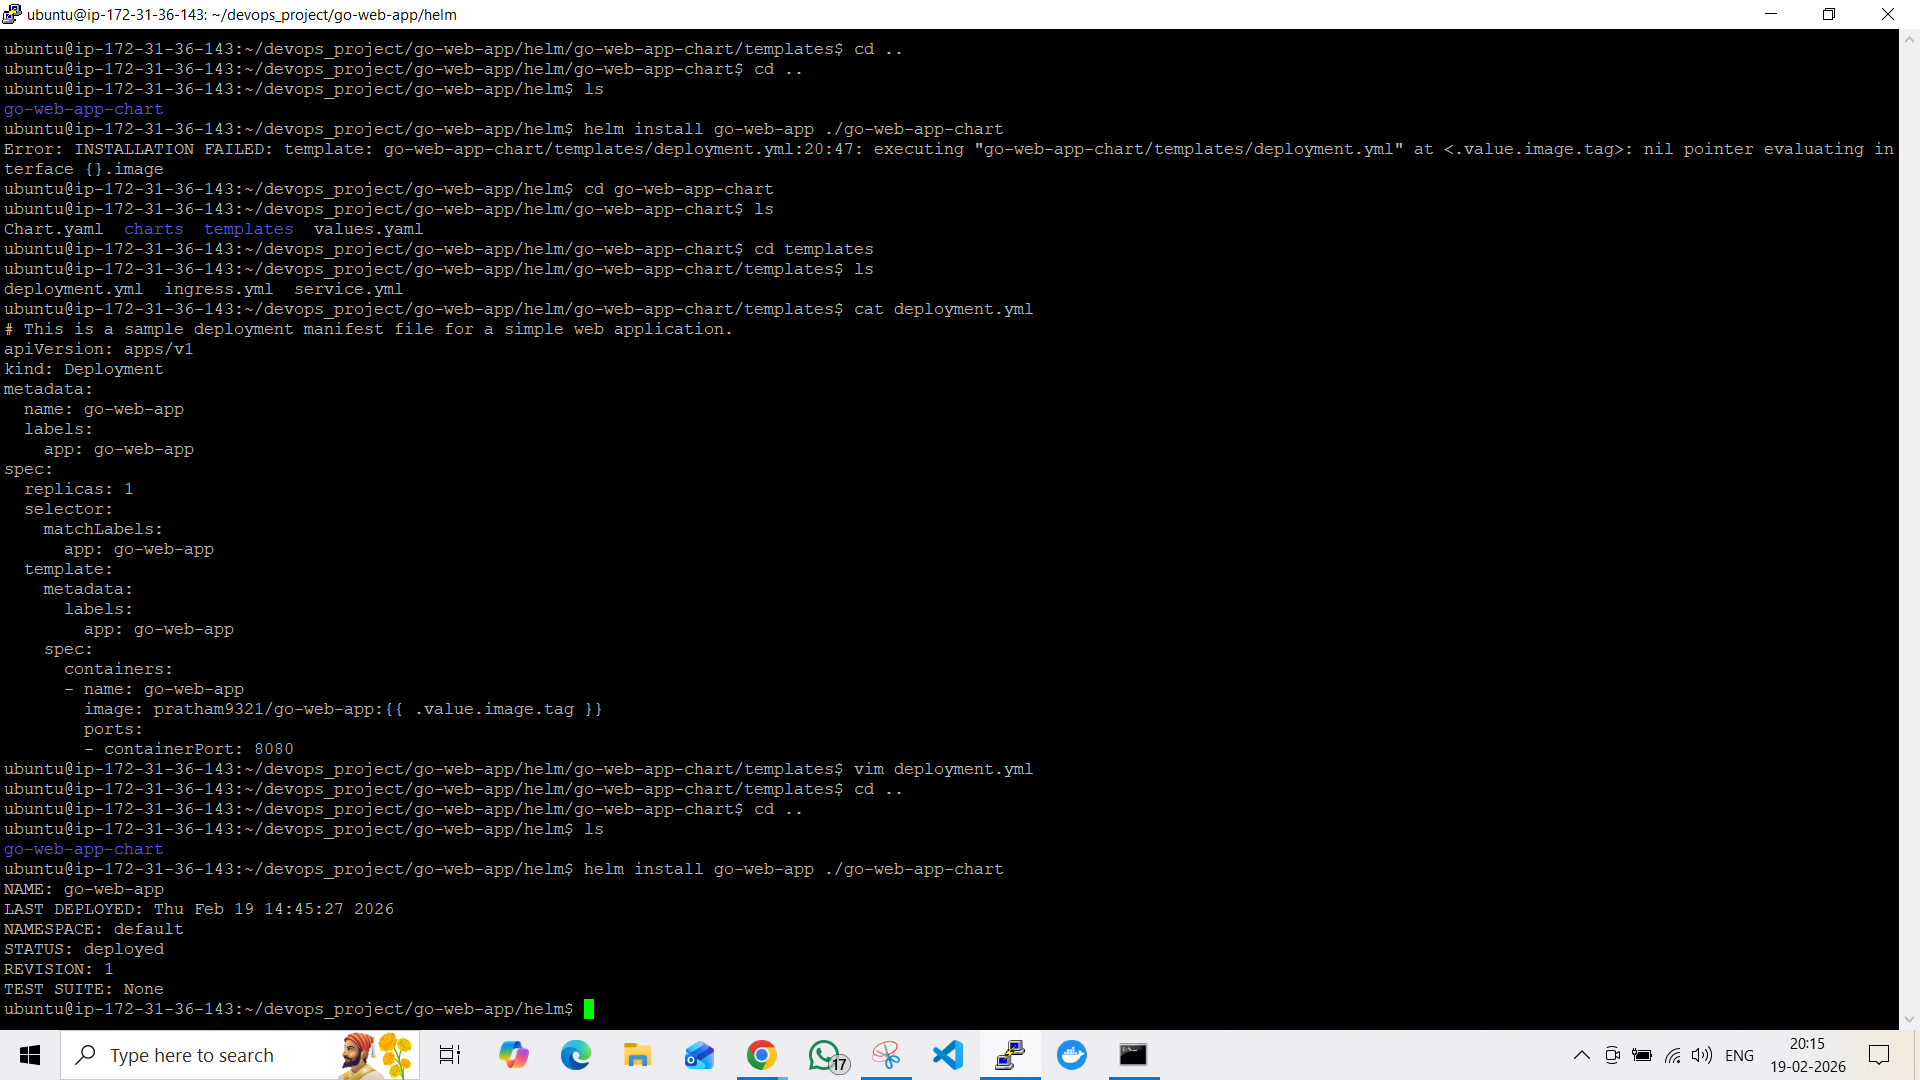

Thus we have implemented through helm

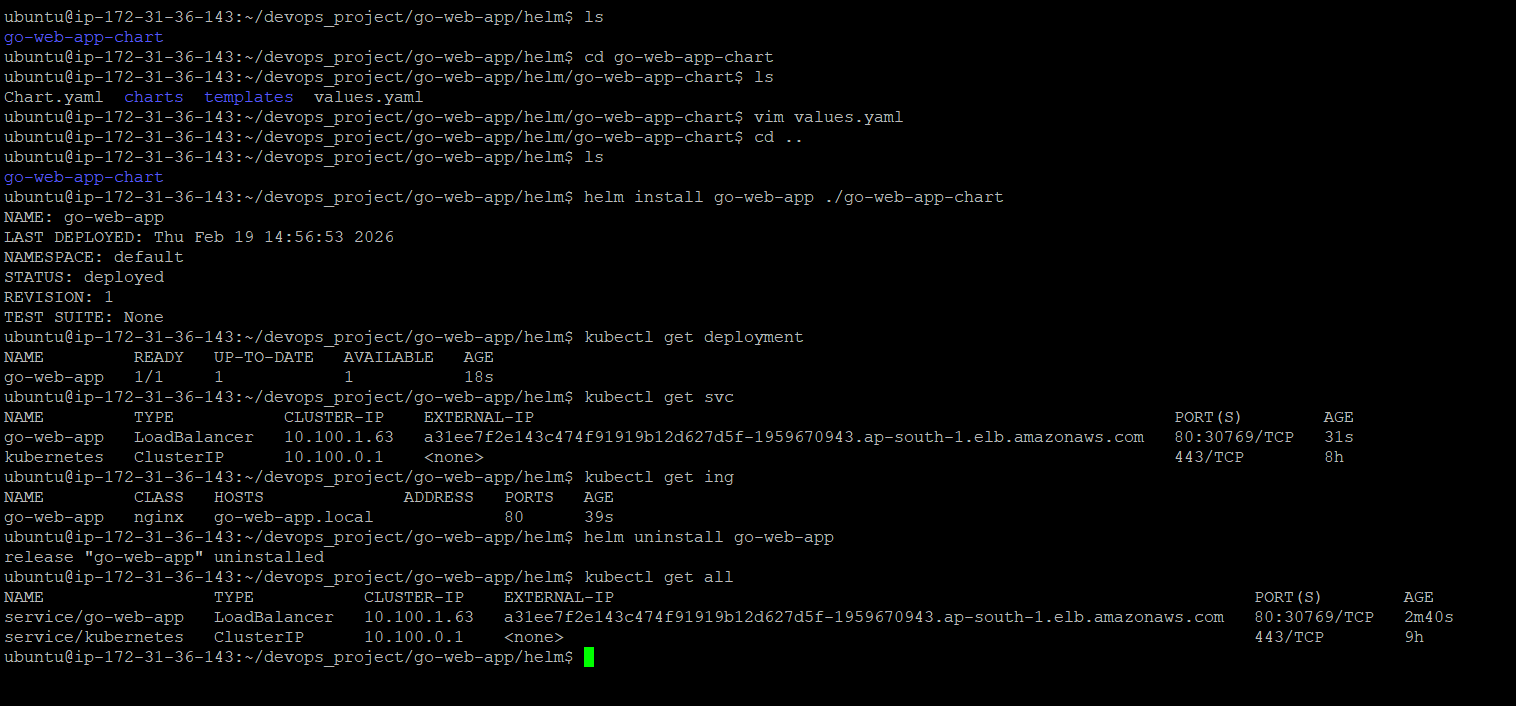

**How values.yaml Works Internally (Flow)**

When you run:

helm install go-web-app ./go-web-app-chart

Helm does:

Reads values.yaml

Reads templates (deployment, service, ingress)

Replaces variables like {{ .Values.image.tag }}

Generates final Kubernetes YAML

Deploys to cluster

thus helm part is done we will start implementing ci and cd

**CI using Github Actions**

**will build multiple stages**

**stage 1** we will do build and test

**stage 2** - will do static code analysis

**stage 3** - we will build docker image and push docker image

**stage 4** - update helm with the docker image that we have created


**after this we will apply CD**

we will use argocd

what we will do in cd - once the helm tag is updated argo cd will pull the helm tag and deploy it on kubernetes cluster

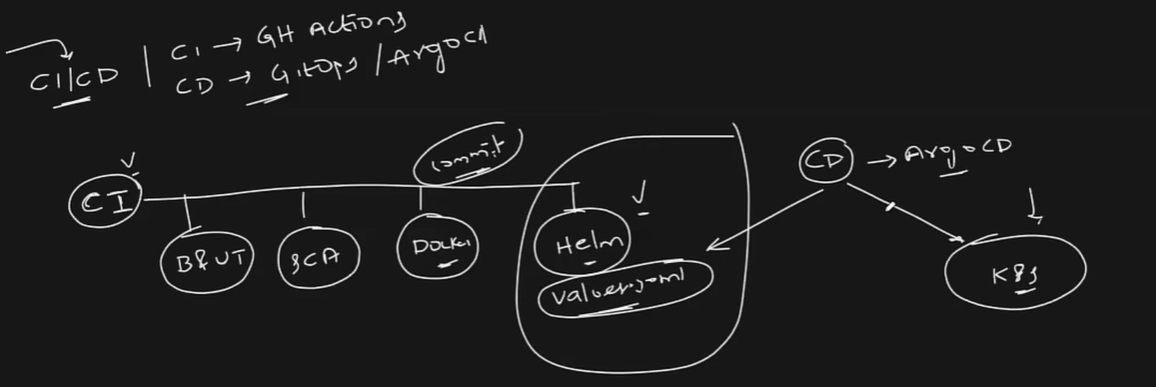

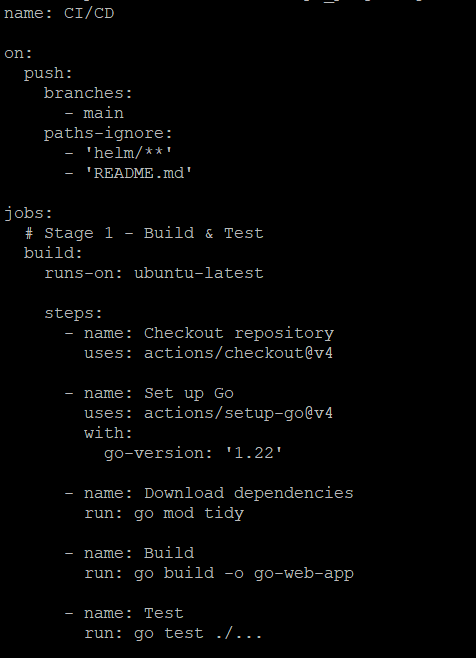

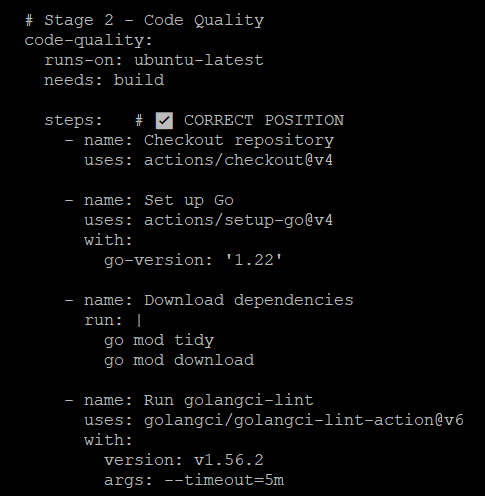

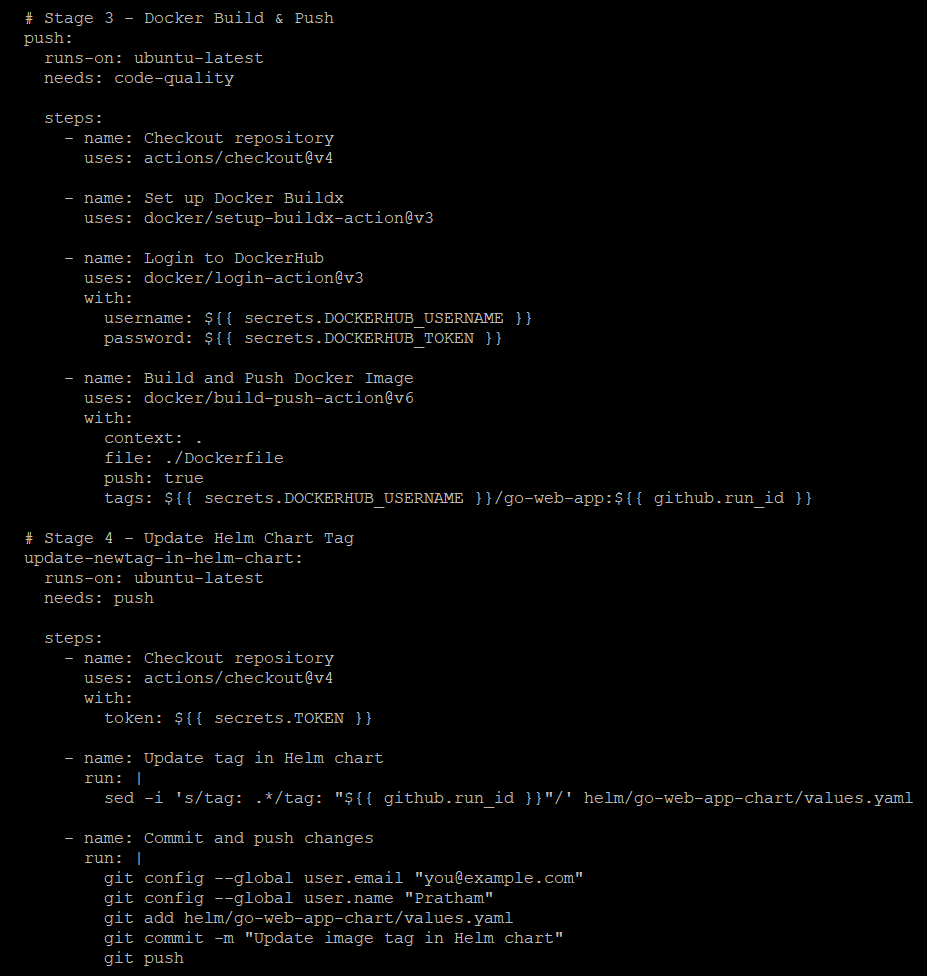

important is how ci working - Everynew Commit is updated to your helm and how cd immediately pickups those change and deploy that on kubernetes cluster

for docker image

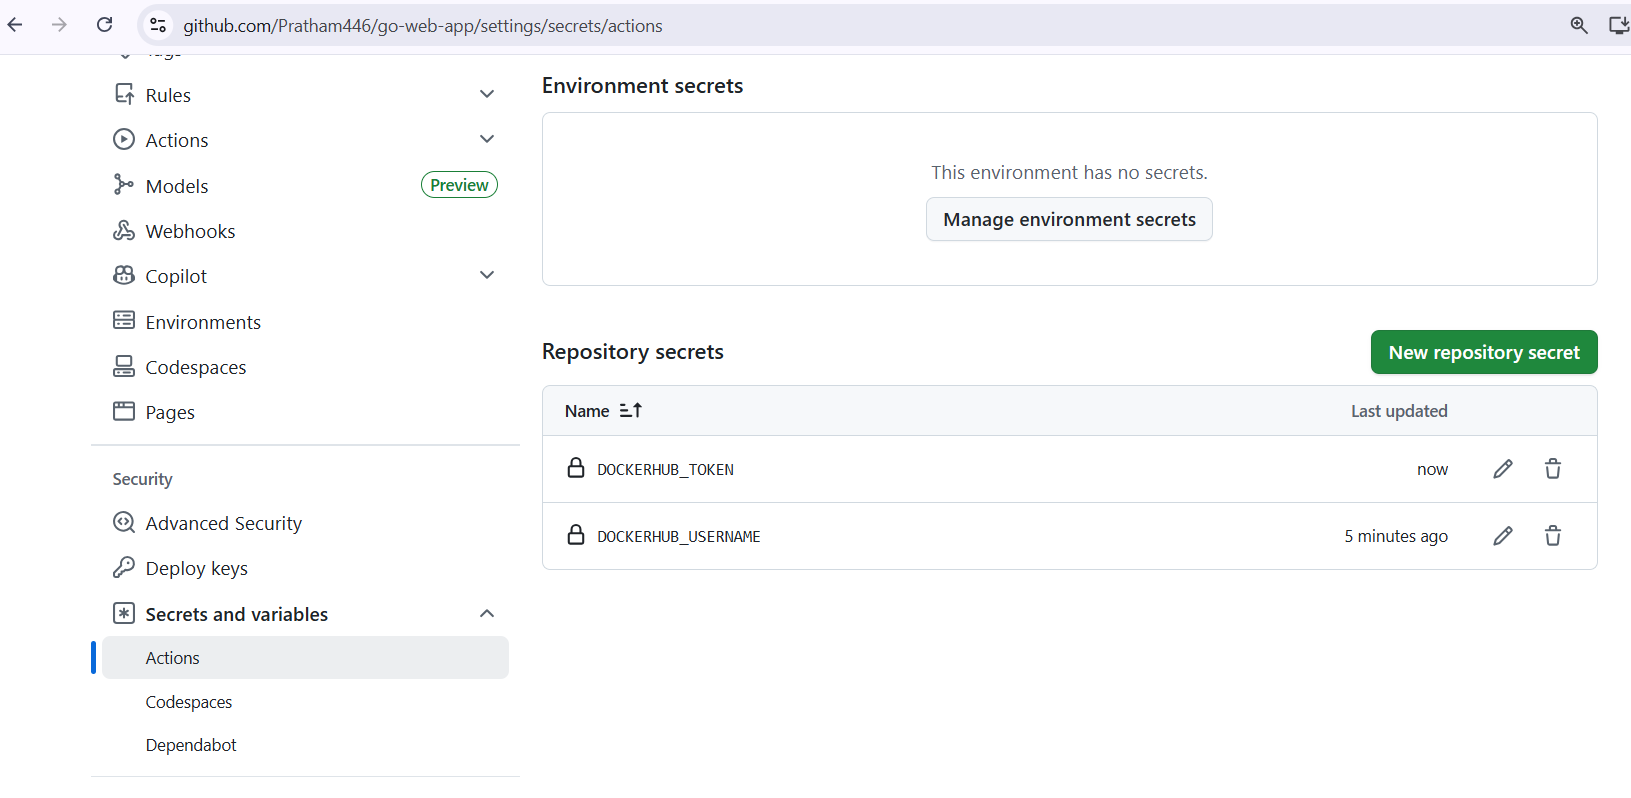

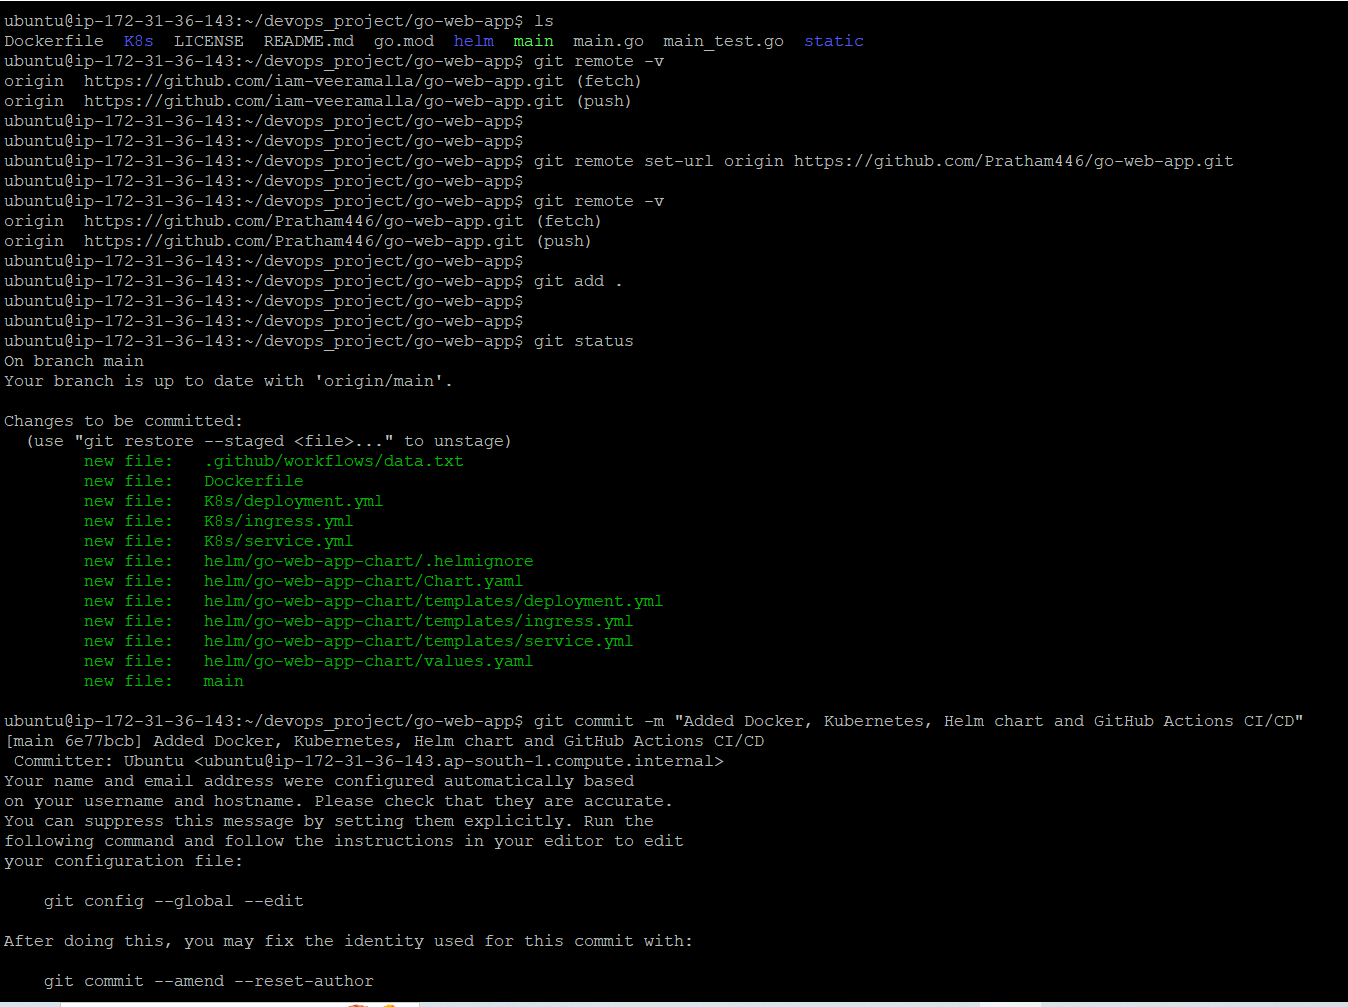

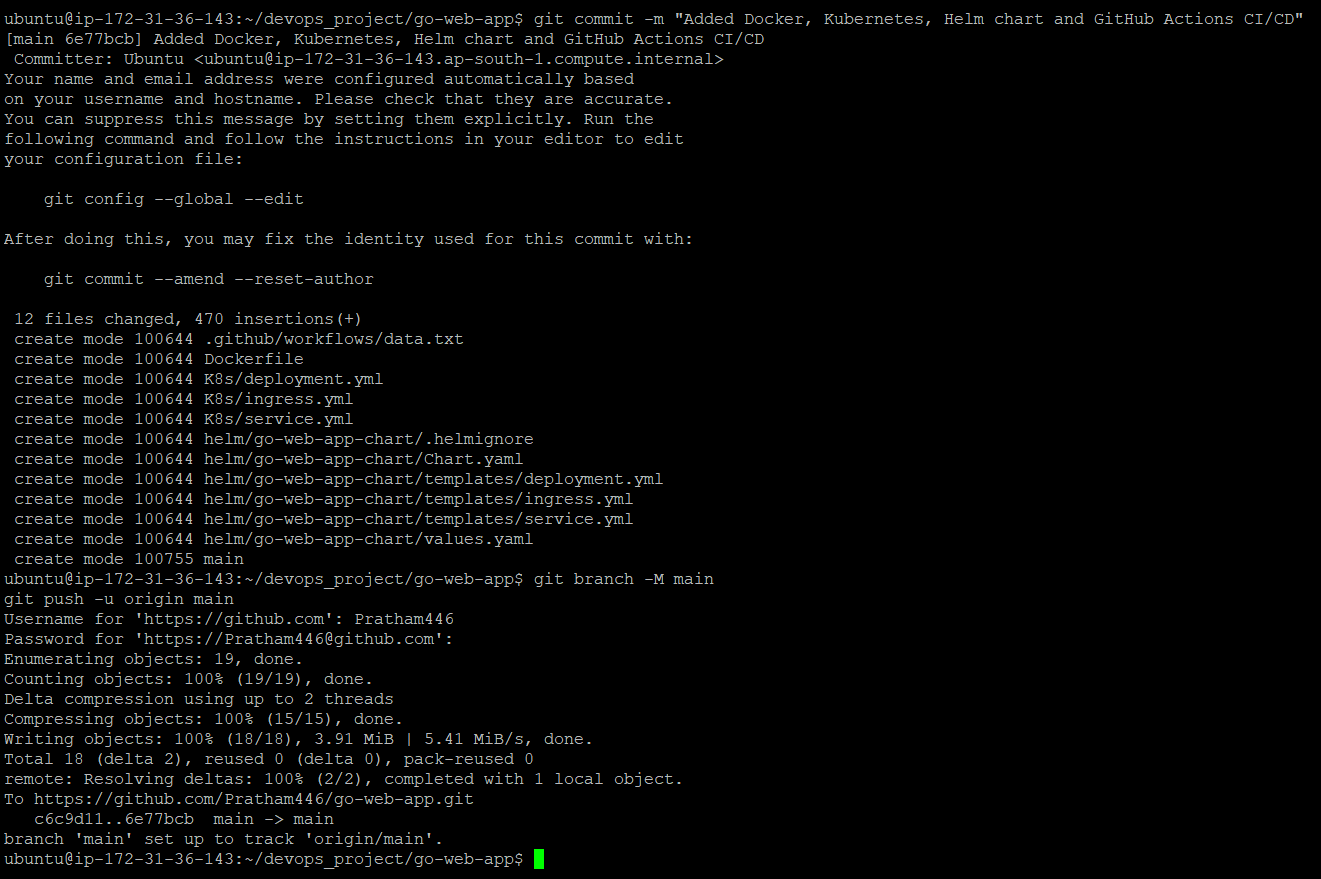

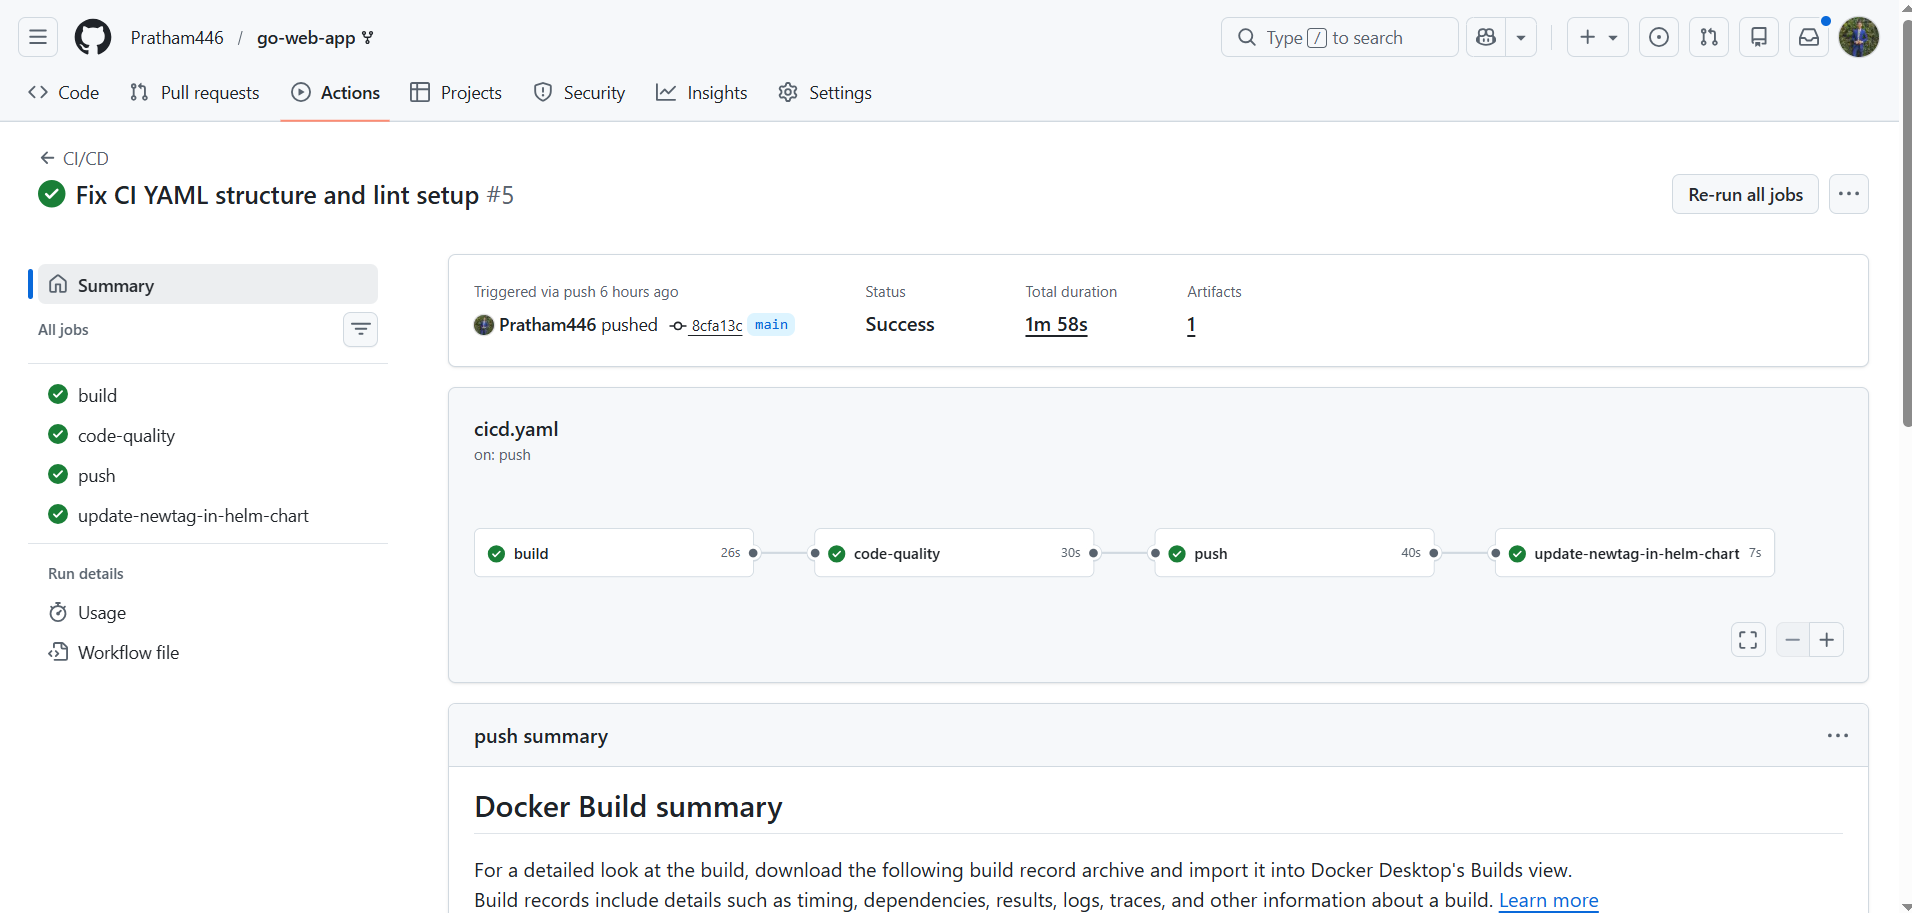

**thus new image is created and value of the tag is assigned by cicd**


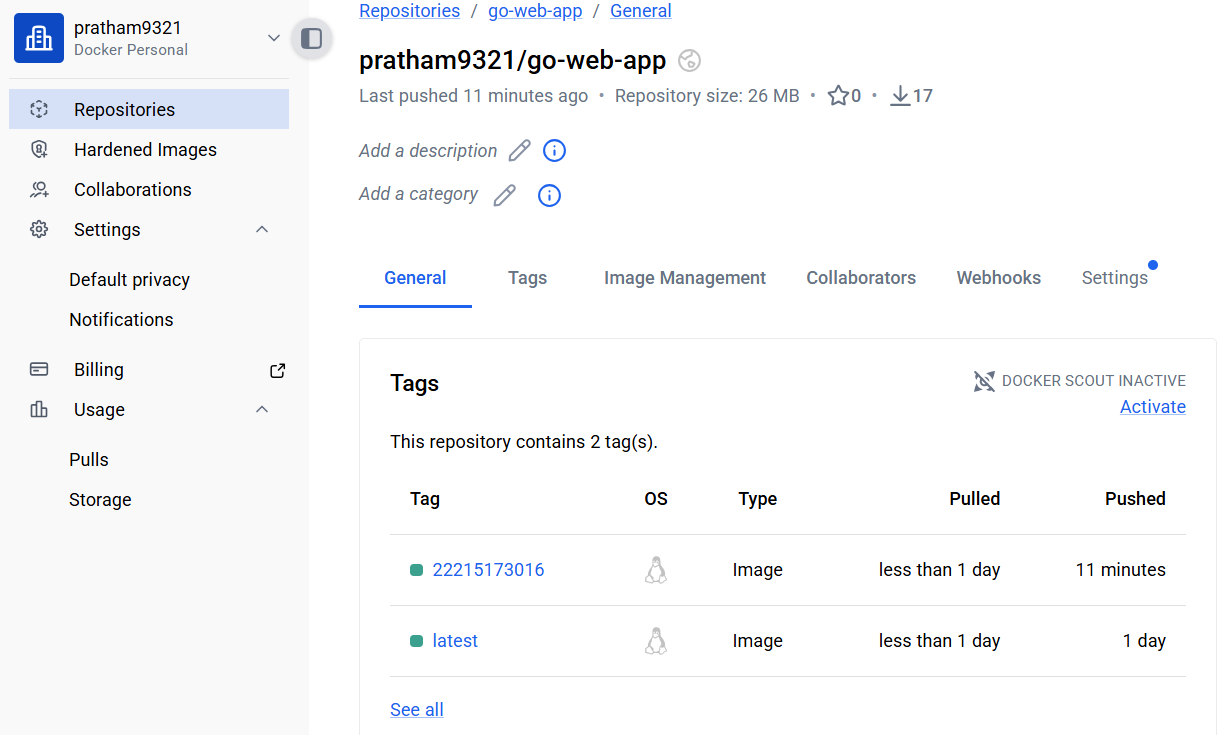

**we have updated the helm with the new tag that is created in docker image and update it in value.yaml inside tag - this what we done in last stage of cicd**

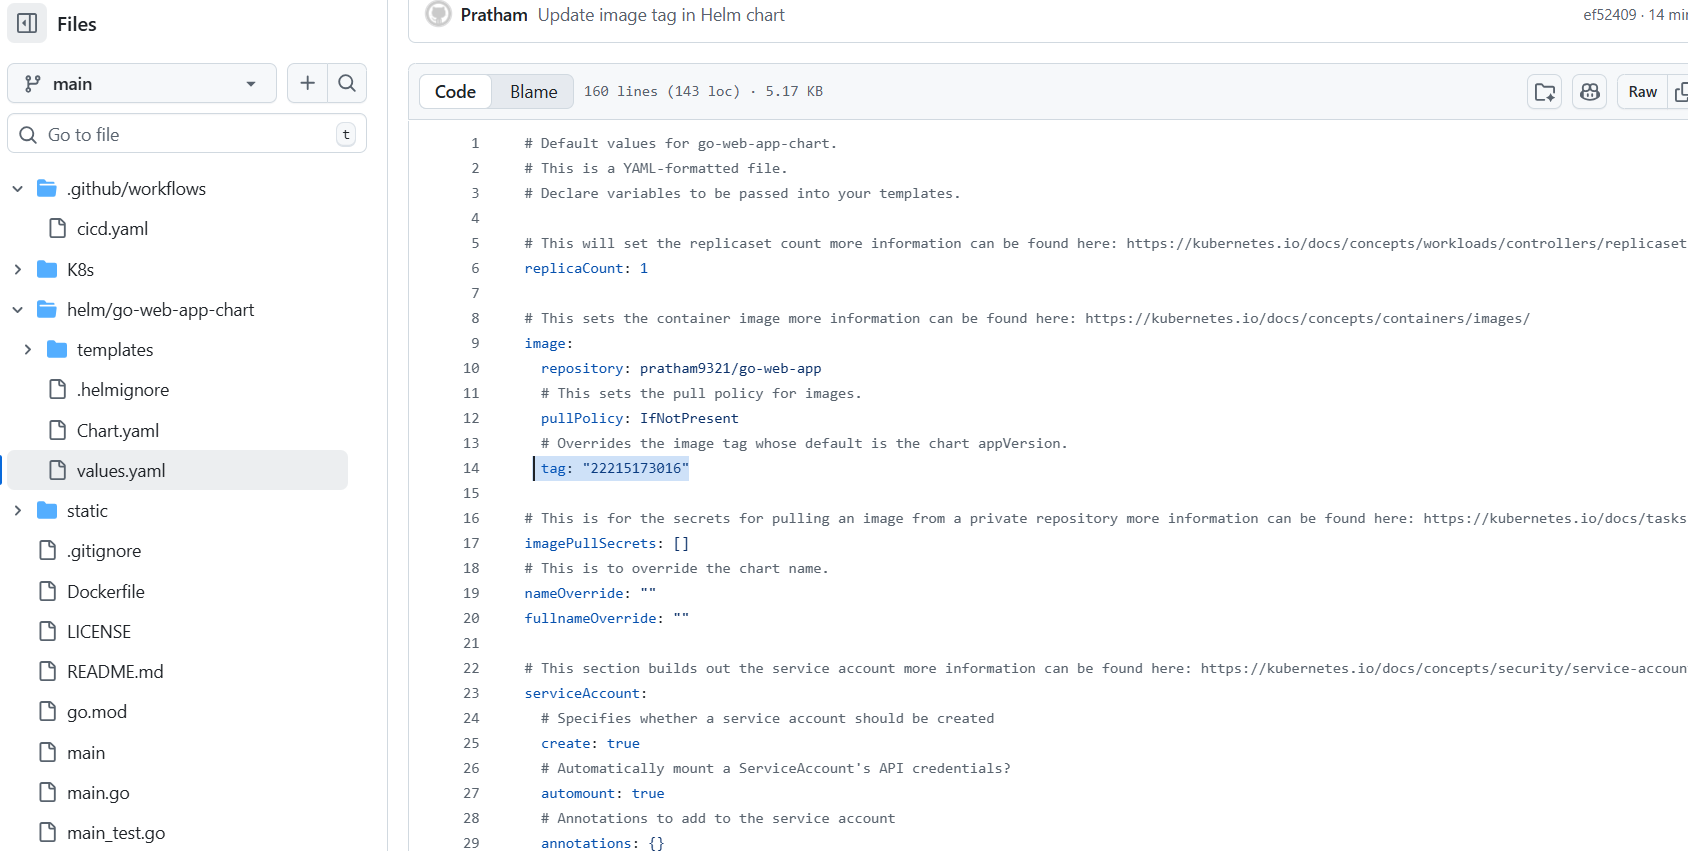

Argo CD is a GitOps continuous delivery tool for Kubernetes.

In simple words:

Argo CD automatically deploys your app to Kubernetes by watching your Git repository.

Step-by-step flow:

You push code to GitHub

GitHub Actions builds Docker image

Helm chart gets updated (image tag)

Argo CD detects Git change

Argo CD auto deploys to Kubernetes (EKS/cluster)

Installing ArgoCD

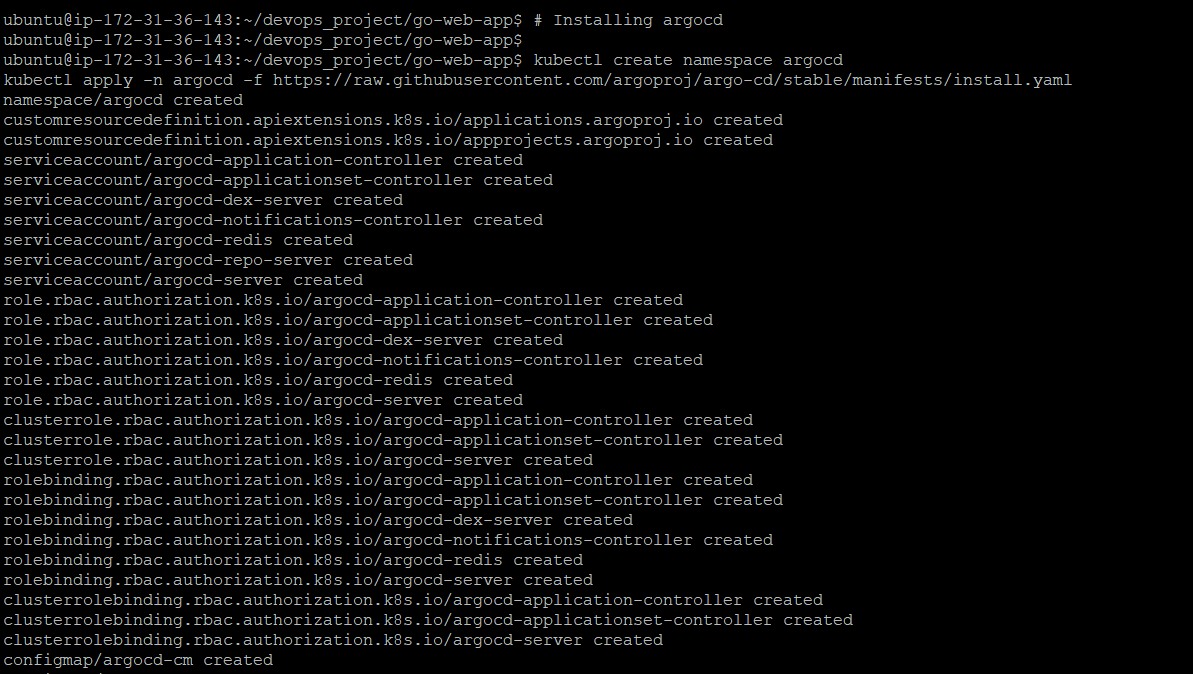

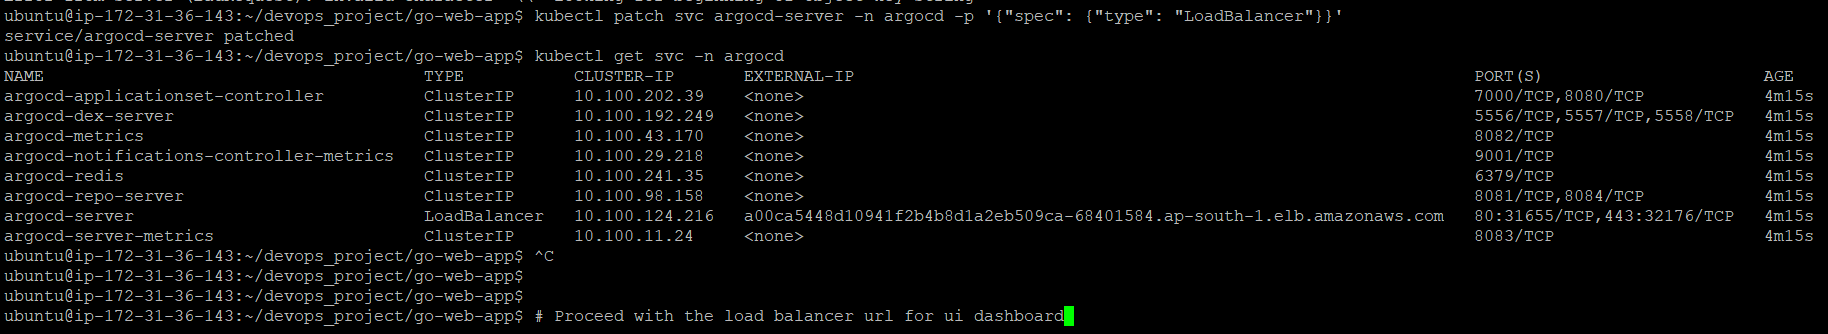

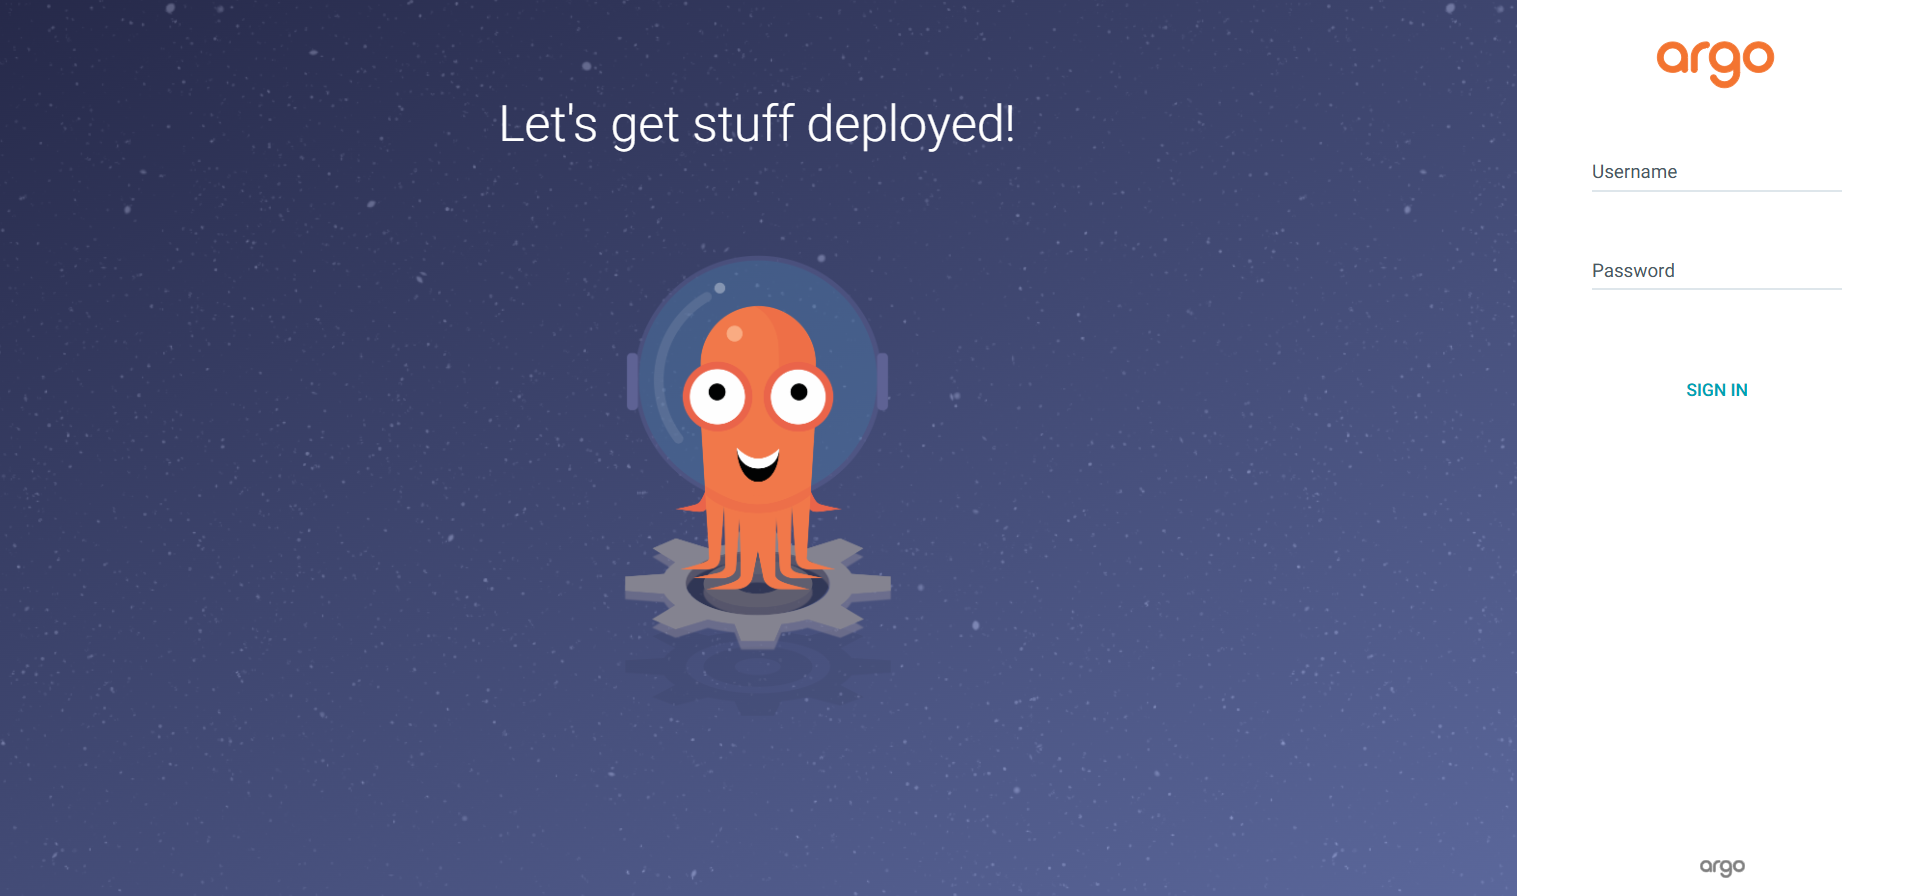

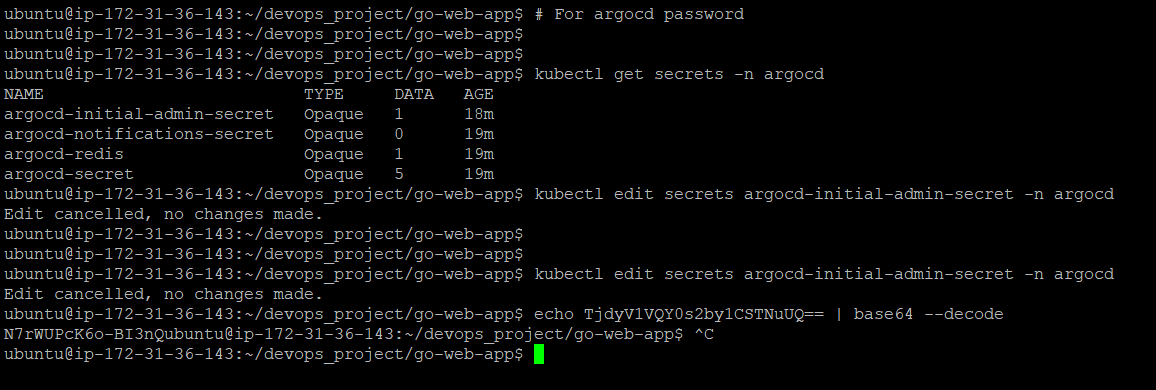

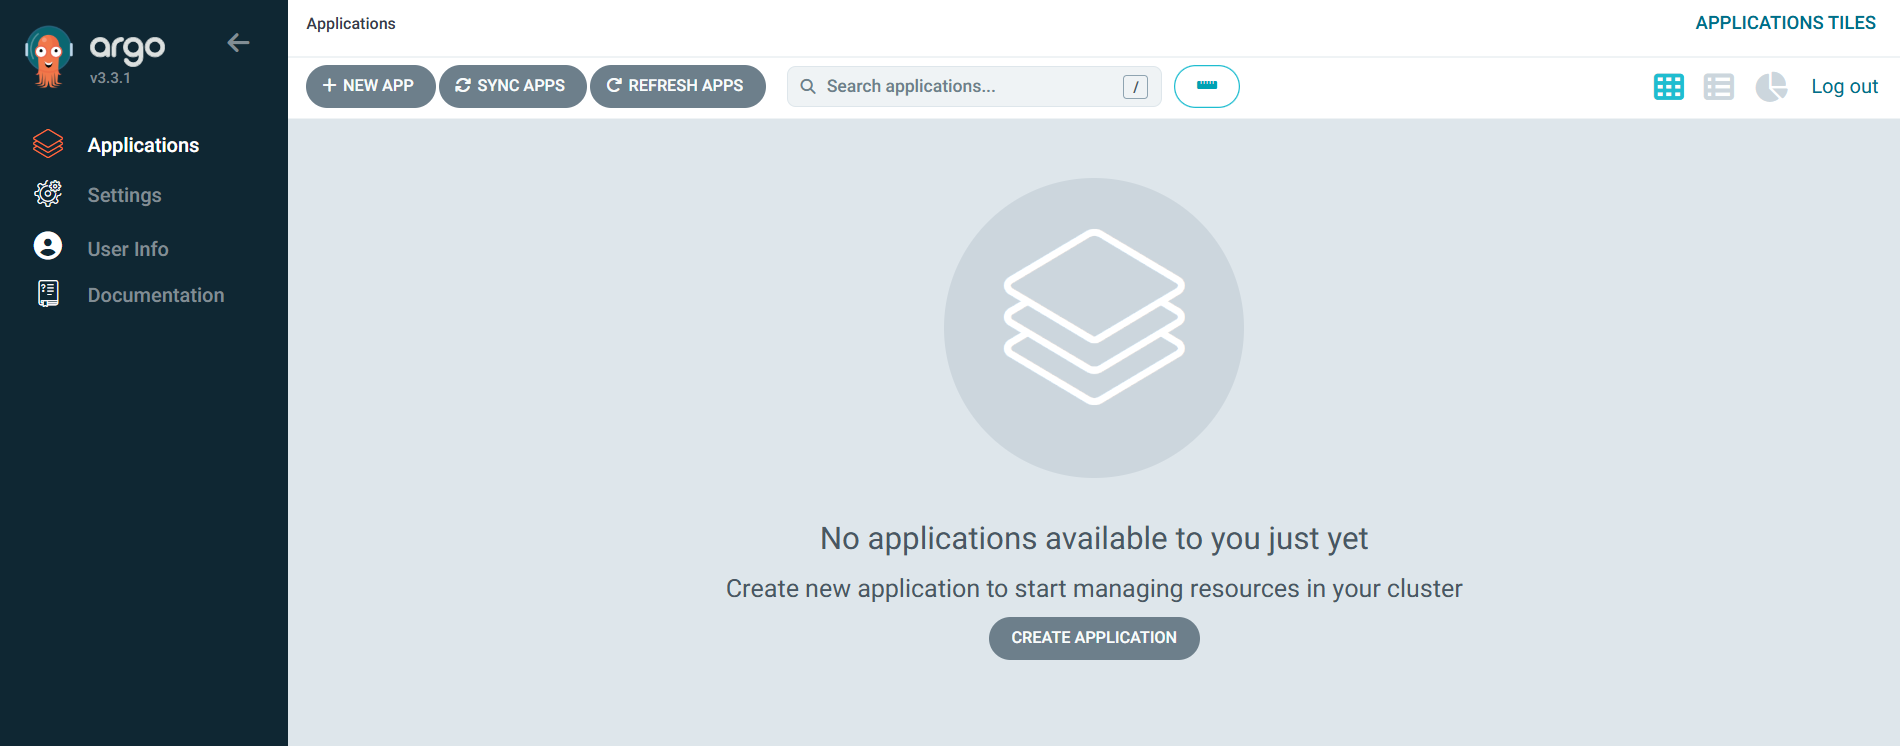

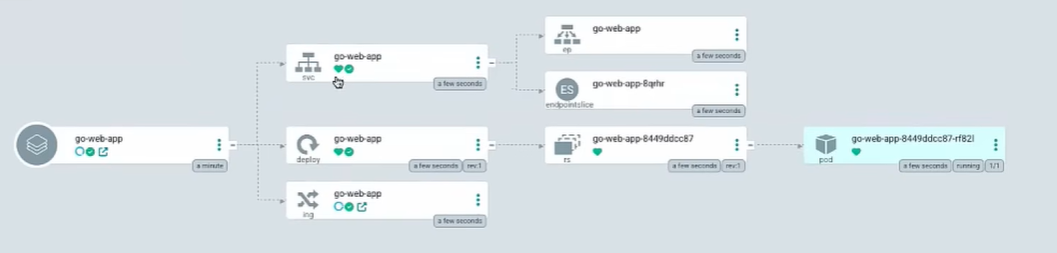